<div
    style="color:white;
            background-color: black;
            border-style: solid;
            border-radius: 25px;
            border-color: purple;
            border-width: 10px;
            text-align: center;
            padding-left: 10px"> 
    <span style="color:white; font-size:30px; font-weight: bold;">  Predictive Maintenance Classification </span>
</div>    

<html>
<body>
<div style="color:white;
            background-color: black;
            border-style: solid;
            border-radius: 25px;
            border-color: purple;
            border-width: 15px;
            padding-left: 10px">
        
       
<span style="color: red; fornt-size:20px; font-weight: bold;">  Data Description </span><br>
    
This dataset reflects real predictive maintenance encountered in the industry with measurements from real equipment. The features description is taken directly from the dataset source. <br>
<br>
<span style="font-weight: bold;"> The six features are: </span> <br>
<li>Type: the quality of the product, consisting of a letter L, M, or H. Meaning low, medium, and high, respectively. <br>
<li>Air temperature [K]: generated using a random walk process later normalized to a standard deviation of 2 K around 300 K.<br>
<li>Process temperature [K]: generated using a random walk process normalized to a standard deviation of 1 K, added to the air temperature<br> plus 10 K.<br>
<li>Rotational speed [rpm]: calculated from power of 2860 W, overlaid with a normally distributed noise.<br>
<li>Torque [Nm]: torque values are normally distributed around 40 Nm with an Ïƒ = 10 Nm and no negative values.<br>
<li>Tool wear [min]: The quality variants H/M/L add 5/3/2 minutes of tool wear to the used tool in the process.<br>
<br>

<span style="font-weight: bold;"> The targets are: </span> <br>
<li>Target: failure or no failure (to perform binary classification).<br>
<li>Failure Type: type of failure (to perform multiclass classification).<br>

<br>
It also includes the following information, which is not useful for building the models:<br>
<li>UID: unique identifier ranging from 1 to 10000.<br>
<li>ProductID: the id of the product.<br>
    
</p>
</div>

</body>
</html>

In [94]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn.preprocessing import OrdinalEncoder, MinMaxScaler, RobustScaler
from sklearn.model_selection import GridSearchCV, RandomizedSearchCV, cross_val_score, cross_val_predict, StratifiedShuffleSplit
from sklearn.ensemble import RandomForestClassifier, BaggingClassifier
from imblearn.ensemble import BalancedRandomForestClassifier, BalancedBaggingClassifier, RUSBoostClassifier, EasyEnsembleClassifier
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler, BorderlineSMOTE, SVMSMOTE, KMeansSMOTE
from imblearn.under_sampling import TomekLinks, RandomUnderSampler, NearMiss, ClusterCentroids
from sklearn.pipeline import Pipeline
from sklearn.metrics import accuracy_score, classification_report, precision_score, f1_score, roc_auc_score, recall_score, confusion_matrix
from sklearn.metrics import precision_recall_fscore_support, roc_curve, precision_recall_curve
import pickle
import warnings
warnings.filterwarnings('ignore')
sns.set()

In [6]:
original_dataset = pd.read_csv(r"D:\Machine Learning Nagaraju\ML_Major_project\archive___\predictive_maintenance.csv")
df = original_dataset.copy()

In [8]:
df

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0         1     M14860    M                298.1                    308.6   
1         2     L47181    L                298.2                    308.7   
2         3     L47182    L                298.1                    308.5   
3         4     L47183    L                298.2                    308.6   
4         5     L47184    L                298.2                    308.7   
...     ...        ...  ...                  ...                      ...   
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
0                       1551         42.8                0       0   
1                       1408         46.3                3       0   
2                       1498         49.4                5       0   
3                       1433         39.5                7       0   
4                       1408         40.0                9       0   
...                      ...          ...              ...     ...   
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
0      No Failure  
1      No Failure  
2      No Failure  
3      No Failure  
4      No Failure  
...           ...  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure  

[10000 rows x 10 columns]

In [12]:
df.head()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
0    1     M14860    M                298.1                    308.6   
1    2     L47181    L                298.2                    308.7   
2    3     L47182    L                298.1                    308.5   
3    4     L47183    L                298.2                    308.6   
4    5     L47184    L                298.2                    308.7   

   Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target Failure Type  
0                    1551         42.8                0       0   No Failure  
1                    1408         46.3                3       0   No Failure  
2                    1498         49.4                5       0   No Failure  
3                    1433         39.5                7       0   No Failure  
4                    1408         40.0                9       0   No Failure

In [14]:
df.tail()

UDI Product ID Type  Air temperature [K]  Process temperature [K]  \
9995   9996     M24855    M                298.8                    308.4   
9996   9997     H39410    H                298.9                    308.4   
9997   9998     M24857    M                299.0                    308.6   
9998   9999     H39412    H                299.0                    308.7   
9999  10000     M24859    M                299.0                    308.7   

      Rotational speed [rpm]  Torque [Nm]  Tool wear [min]  Target  \
9995                    1604         29.5               14       0   
9996                    1632         31.8               17       0   
9997                    1645         33.4               22       0   
9998                    1408         48.5               25       0   
9999                    1500         40.2               30       0   

     Failure Type  
9995   No Failure  
9996   No Failure  
9997   No Failure  
9998   No Failure  
9999   No Failure

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column                   Non-Null Count  Dtype  
---  ------                   --------------  -----  
 0   UDI                      10000 non-null  int64  
 1   Product ID               10000 non-null  object 
 2   Type                     10000 non-null  object 
 3   Air temperature [K]      10000 non-null  float64
 4   Process temperature [K]  10000 non-null  float64
 5   Rotational speed [rpm]   10000 non-null  int64  
 6   Torque [Nm]              10000 non-null  float64
 7   Tool wear [min]          10000 non-null  int64  
 8   Target                   10000 non-null  int64  
 9   Failure Type             10000 non-null  object 
dtypes: float64(3), int64(4), object(3)
memory usage: 781.4+ KB


In [16]:
df.nunique()

UDI                        10000
Product ID                 10000
Type                           3
Air temperature [K]           93
Process temperature [K]       82
Rotational speed [rpm]       941
Torque [Nm]                  577
Tool wear [min]              246
Target                         2
Failure Type                   6
dtype: int64

In [24]:
df.describe()

UDI  Air temperature [K]  Process temperature [K]  \
count  10000.00000         10000.000000             10000.000000   
mean    5000.50000           300.004930               310.005560   
std     2886.89568             2.000259                 1.483734   
min        1.00000           295.300000               305.700000   
25%     2500.75000           298.300000               308.800000   
50%     5000.50000           300.100000               310.100000   
75%     7500.25000           301.500000               311.100000   
max    10000.00000           304.500000               313.800000   

       Rotational speed [rpm]   Torque [Nm]  Tool wear [min]        Target  
count            10000.000000  10000.000000     10000.000000  10000.000000  
mean              1538.776100     39.986910       107.951000      0.033900  
std                179.284096      9.968934        63.654147      0.180981  
min               1168.000000      3.800000         0.000000      0.000000  
25%               1423.000000     33.200000        53.000000      0.000000  
50%               1503.000000     40.100000       108.000000      0.000000  
75%               1612.000000     46.800000       162.000000      0.000000  
max               2886.000000     76.600000       253.000000      1.000000

**Quick insights:** 
* There are 10.000 instances in the dataset
* The are no missing values (every feature has 10.000 observations)
* Target variable are 1 and 0
* UDI seems to be an index number
* Product ID is an identification number. Hence, it can be removed

In [28]:
# Checking unique values for 'UDI' and 'Product ID'
print(f"{df['UDI'].nunique()} unique values for 'UDI'")
print(f"{df['Product ID'].nunique()} unique value for 'Pruduct ID'")

10000 unique values for 'UDI'
10000 unique value for 'Pruduct ID'


In [30]:
# Dropping 'UDI' and 'Product ID' from the dataset
df.drop(['UDI', 'Product ID'], axis=1, inplace=True)

In [32]:
# Let's change the name of the columns.
df = df.rename(mapper={'Air temperature [K]': 'Air_temperature',
                       'Process temperature [K]': 'Process_temperature',
                       'Rotational speed [rpm]': 'Rotational_speed',
                       'Torque [Nm]': 'Torque', 
                       'Tool wear [min]': 'Tool_wear'}, axis=1)

In [34]:
# Taking a look at 'Failure Type' variable
df['Failure Type'].value_counts()

Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

This target variable assumes six possible values: no failure, or five different types of failure.


**Quick insight:** We can see that the dataset is highly unbalanced. Let's further check that with the 'target' variable:


In [39]:
df['Target'].value_counts(normalize=True)

Target
0    0.9661
1    0.0339
Name: proportion, dtype: float64



#### *Note:* The dataset is indeed very unbalanced. We will deal with that later on.
 

In [44]:
# Rechecking for missing values
df.isna().sum()

Type                   0
Air_temperature        0
Process_temperature    0
Rotational_speed       0
Torque                 0
Tool_wear              0
Target                 0
Failure Type           0
dtype: int64

In [46]:
df['Type'].value_counts()

Type
L    6000
M    2997
H    1003
Name: count, dtype: int64

`'Type'` assumes three possible values. Later on they will be hot or ordinal encoded.

In [53]:
# Taking a look at the data types
df.dtypes

Type                    object
Air_temperature        float64
Process_temperature    float64
Rotational_speed         int64
Torque                 float64
Tool_wear                int64
Target                   int64
Failure Type            object
dtype: object

<span style="color:#26488F; font-size:18px; font-weight: bold;">  Target variables </span>

There are two target variables: 'Target' and 'Failure Type'. Let's dig in a bit to check if everything is ok.

In [57]:
# Checking types of failure
df['Failure Type'].value_counts()


Failure Type
No Failure                  9652
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

* ##### There are 5 types of failure + not failure.

* ##### Now, let's check if there are inconsistencies between 'Target' and 'Failure Type': 


In [61]:
df_failure = df[df['Target'] == 1]
df_failure['Failure Type'].value_counts()

Failure Type
Heat Dissipation Failure    112
Power Failure                95
Overstrain Failure           78
Tool Wear Failure            45
No Failure                    9
Name: count, dtype: int64

**WARNING!!** 9 values are classified as failure in the 'Target' variable but as No Failure in the 'Failure Type' variable. Let's check in the dataset:

In [64]:
df_failure[df_failure['Failure Type'] == 'No Failure']

Type  Air_temperature  Process_temperature  Rotational_speed  Torque  \
1437    H            298.8                309.9              1439    45.2   
2749    M            299.7                309.2              1685    28.9   
4044    M            301.9                310.9              1419    47.7   
4684    M            303.6                311.8              1421    44.8   
5536    M            302.3                311.8              1363    54.0   
5941    L            300.6                310.7              1438    48.5   
6478    L            300.5                309.8              1663    29.1   
8506    L            298.4                309.6              1710    27.3   
9015    L            297.2                308.1              1431    49.7   

      Tool_wear  Target Failure Type  
1437         40       1   No Failure  
2749        179       1   No Failure  
4044         20       1   No Failure  
4684        101       1   No Failure  
5536        119       1   No Failure  
5941         78       1   No Failure  
6478        145       1   No Failure  
8506        163       1   No Failure  
9015        210       1   No Failure


* ##### It could go both ways, either failure or no failure. I think it would make sense to remove those instances since I do not know the real target here.


In [69]:
index_possible_failure = df_failure[df_failure['Failure Type'] == 'No Failure'].index
df.drop(index_possible_failure, axis=0, inplace=True)



Let's check the same but for 'Target' variable equal to zero (no failure):
    

In [74]:
df_failure = df[df['Target'] == 0]
df_failure['Failure Type'].value_counts()

Failure Type
No Failure         9643
Random Failures      18
Name: count, dtype: int64

In [76]:
df['Failure Type'].value_counts()

Failure Type
No Failure                  9643
Heat Dissipation Failure     112
Power Failure                 95
Overstrain Failure            78
Tool Wear Failure             45
Random Failures               18
Name: count, dtype: int64

**Second warning!!** Similarly, we have 18 instances classifed as Random Failures by 'Failure Type', whereas they are classifed as No failure by the 'Target Variable'. These 18 instances are in fact all instaces of 'Random Failures'.
Again, let's check and remove those instances as we do not really know if they belong to Failure class or not. Hence, we will end up with 4 types of failures since 'Random Failures' will be removed altogether.

In [79]:
df_failure[df_failure['Failure Type'] == 'Random Failures']

Type  Air_temperature  Process_temperature  Rotational_speed  Torque  \
1221    M            297.0                308.3              1399    46.4   
1302    L            298.6                309.8              1505    45.7   
1748    H            298.4                307.7              1626    31.1   
2072    L            299.6                309.5              1570    35.5   
2559    L            299.3                309.0              1447    50.4   
3065    M            300.1                309.2              1687    27.7   
3452    H            301.6                310.5              1602    32.3   
5471    L            302.7                312.3              1346    61.2   
5489    L            302.6                312.1              1499    35.0   
5495    H            302.9                312.5              1357    55.0   
5509    L            302.8                312.2              1509    36.5   
5553    L            302.5                311.9              1306    59.7   
5639    L            302.6                312.1              1668    28.7   
6091    L            300.9                310.7              1412    57.5   
6913    L            300.8                311.2              1481    38.5   
6960    L            300.7                311.0              1413    52.0   
7488    L            300.3                311.7              1545    43.5   
7868    H            300.4                311.9              1438    46.7   

      Tool_wear  Target     Failure Type  
1221        132       0  Random Failures  
1302        144       0  Random Failures  
1748        166       0  Random Failures  
2072        189       0  Random Failures  
2559        140       0  Random Failures  
3065         95       0  Random Failures  
3452          2       0  Random Failures  
5471        170       0  Random Failures  
5489        215       0  Random Failures  
5495         12       0  Random Failures  
5509         52       0  Random Failures  
5553        172       0  Random Failures  
5639        180       0  Random Failures  
6091         16       0  Random Failures  
6913        181       0  Random Failures  
6960         91       0  Random Failures  
7488        160       0  Random Failures  
7868         41       0  Random Failures

In [81]:
index_possible_failure = df_failure[df_failure['Failure Type'] == 'Random Failures'].index
df.drop(index_possible_failure, axis=0, inplace=True)

27 Instances were removed (0.27% of the entire dataset). of which:

* 9 belonged to class **Failure in "Target"** variable and **No Failure in target"Failure Type"**
* 18 belonged to class **No Failure in **Target"** variable and **Random Failure in Target"Failure Type"**.

In [85]:
# We can check that all 27 instances were removed from the dataset:
df.shape[0]

9973

In [87]:
# Let's reset the index
df.reset_index(inplace=True, drop=True)

<span style="color:#26488F; font-size:28px; font-weight: bold;">  Explanatory Data Analysis (EDA) </span>

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Correlation </span>

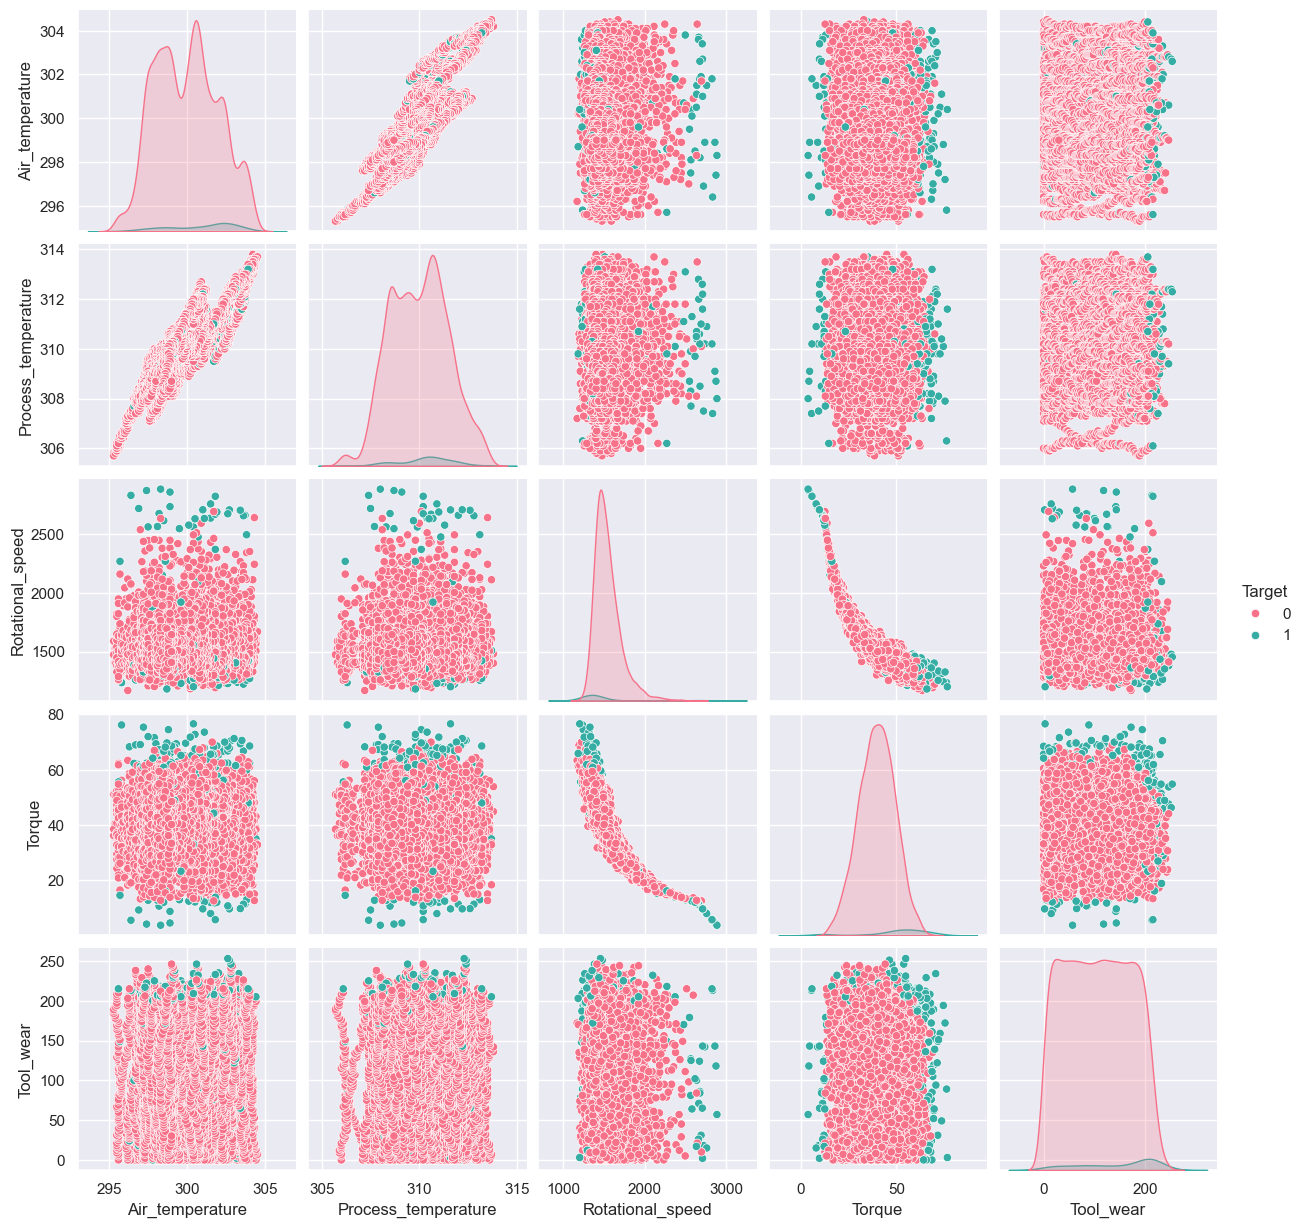

In [91]:
sns.pairplot(df, hue='Target', palette='husl')

**Insights:** 
* Torque and rotational speed are highly correlated.
* Process temperature and air temperature are also highly correlated.
* We immediately see that failures occur for extreme values of some features, i.e., the machinery fails either for the lowest or largest values of torque and rotational speed. This is easily spotted in the graph since the green dots are far apart for those features. So, there is a range for normal conditions in which the machines operate, and above or under this range, they tend to fail.

Let's plot a violin chart to see how torque and rotational speed behave:

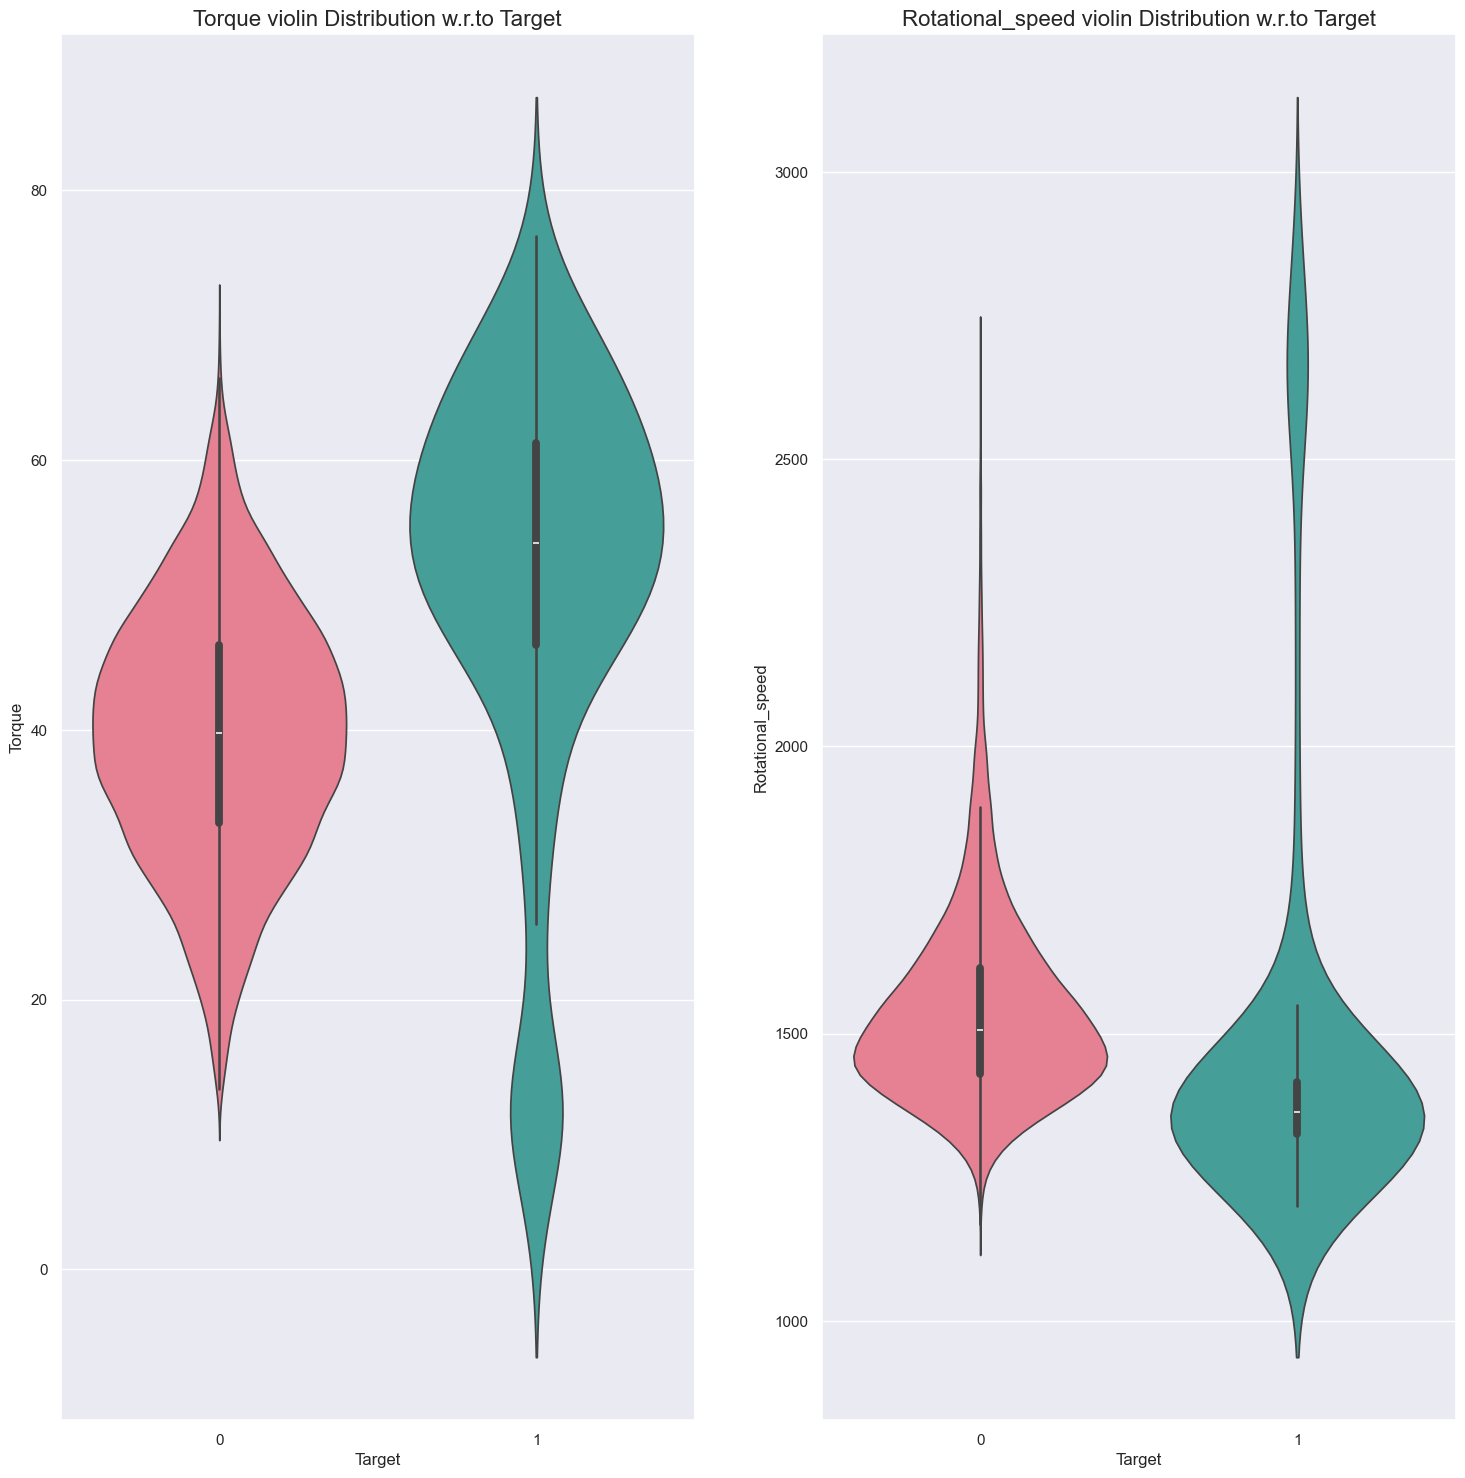

In [100]:
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['axes.titlesize'] = 16

fig, axes = plt.subplots(1, 2, figsize=[18,18])
axes=axes.flatten()
j=0

for i in ['Torque', 'Rotational_speed']:
    sns.violinplot(data=df, x='Target', y=i, ax=axes[j], palette='husl')
    axes[j].set_title(i + " violin Distribution w.r.to Target",)
    j +=1

**Insights** Regarding Torque and Rotational speed, it can be seen again that most failures are triggered for much lower or much higher values than the mean when not failing

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Percentage of failure </span>

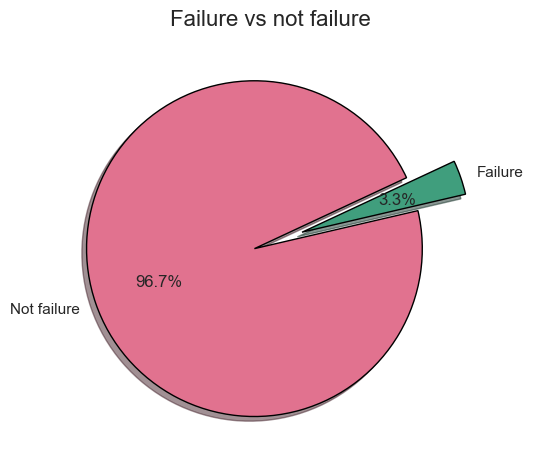

In [104]:
colors = ['#E1728F', '#409E7D'] 
plt.pie(df['Target'].value_counts(),  explode=[0.1, 0.2], labels=['Not failure', 'Failure'],
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25,
        colors=colors)
plt.title('Failure vs not failure')
plt.tight_layout()
plt.show()

**Insight:** as mentioned before, highly unbalanced dataset.

<span style="color:#26488F; font-size:22px; font-weight: bold;"> Correllation Heatmap </span>

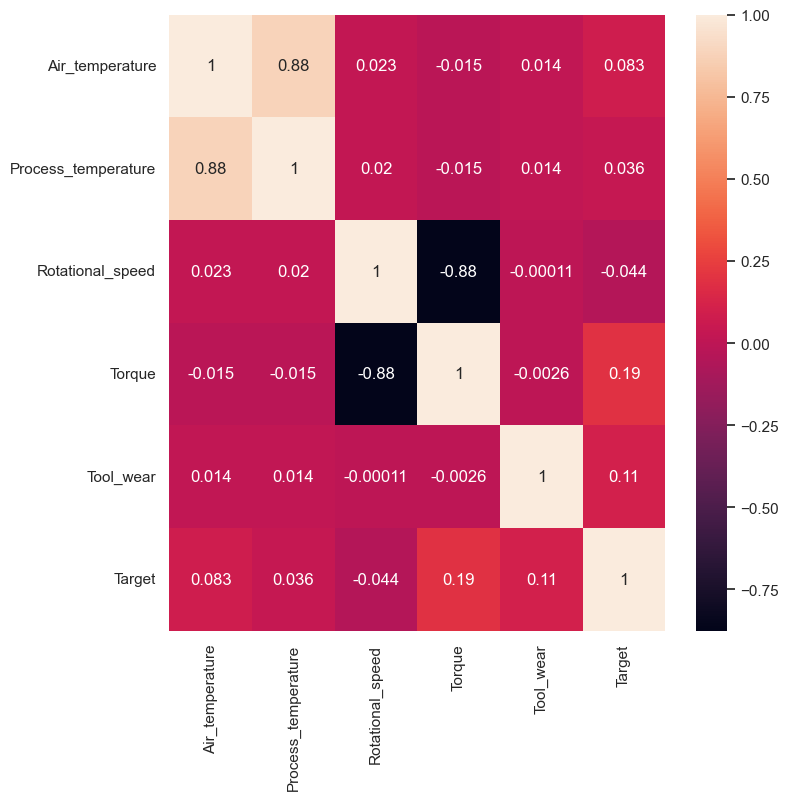

In [110]:
# plt.figure(figsize=(8, 8))
# sns.heatmap(df.corr(), annot=True)
# plt.show()

# Select only numeric columns
numeric_df = df.select_dtypes(include=[np.number])

# Plot the heatmap
plt.figure(figsize=(8, 8))
sns.heatmap(numeric_df.corr(), annot=True)
plt.show()


**Insights:** As mentioned before, there is *High correlation* between process `temperature and air temperature`, and between `rotational speed and torque`.


In [115]:
df.columns

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear', 'Target', 'Failure Type'],
      dtype='object')

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Product types </span>

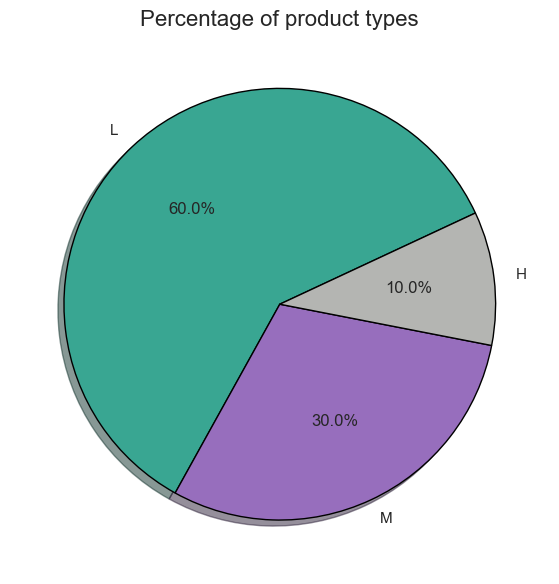

In [131]:
plt.rcParams["figure.figsize"] = (6,6)
colors = ['#39A692', '#976EBD', '#B4B5B2']
plt.pie(df['Type'].value_counts(), labels=['L', 'M', 'H'], colors=colors,
    autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25)

plt.title('Percentage of product types')
plt.tight_layout()

**H**  - High Quality

**L** - Low Quality

**M** - Medium Quality

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Percentage of failure wrt product type </span>

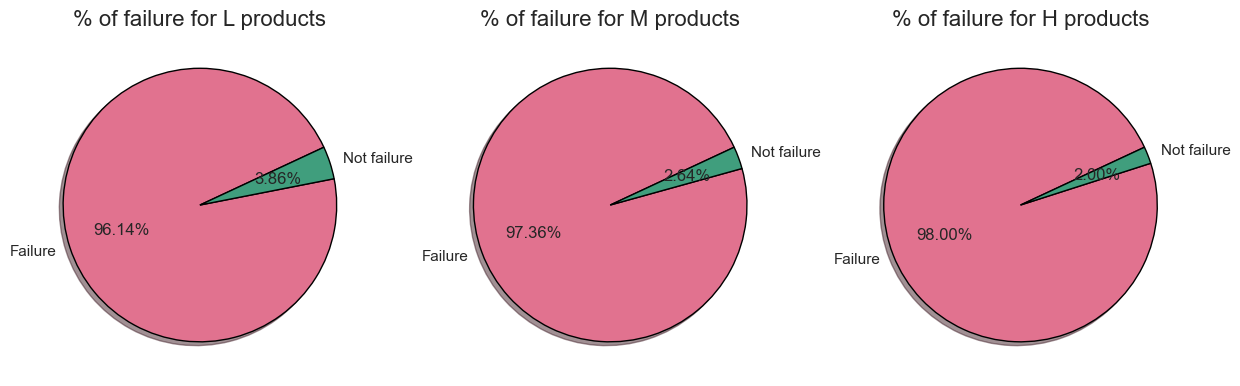

In [139]:
fig, axes = plt.subplots(1,3, figsize=[15,5])
axes.flatten()
j=0
colors = ['#E1728F', '#409E7D'] 
for i in ['L', 'M', 'H']:
    df_product_type = df[df['Type'] == i]
    axes[j].pie(df_product_type['Target'].value_counts(), labels=['Failure', 'Not failure'],
                autopct='%1.2f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25,
                colors=colors)
    axes[j].set_title('% of failure for ' + i + ' products')
    j+=1

**Insight:** L products have a higher ratio of failure compared to the other product types. Moreover, M tends to fail more than H products.

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Percentage of failure types </span>

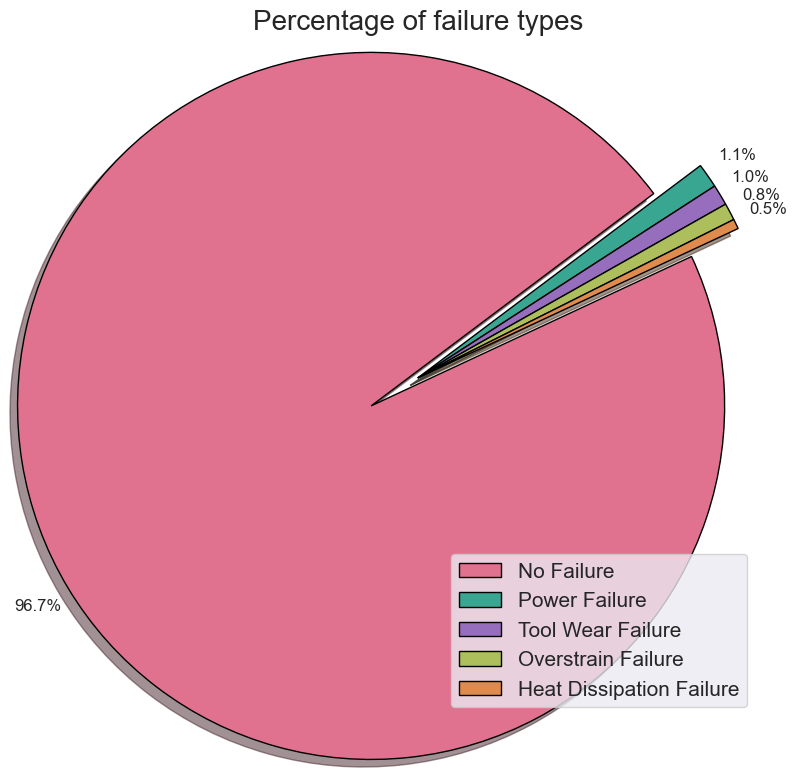

In [145]:
columns_failure_type = df['Failure Type'].unique().tolist()  # Types of failures

plt.rcParams["figure.figsize"] = (8,8)
colors = ['#E1728F', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E']

plt.pie(df['Failure Type'].value_counts(), explode=(0.2, 0, 0, 0, 0), autopct='%1.1f%%',
        wedgeprops={'edgecolor': 'black'}, counterclock=False, shadow=True, startangle=25,
        pctdistance=1.1, radius=1.3, colors=colors)
plt.legend(columns_failure_type, loc='lower right', fontsize=15)

plt.title('Percentage of failure types', fontsize=20)
plt.tight_layout()

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Exploring features for each type of failure </span>

In [152]:
df.columns

Index(['Type', 'Air_temperature', 'Process_temperature', 'Rotational_speed',
       'Torque', 'Tool_wear', 'Target', 'Failure Type'],
      dtype='object')

Text(0.5, 1.0, 'Excluding class no failure')

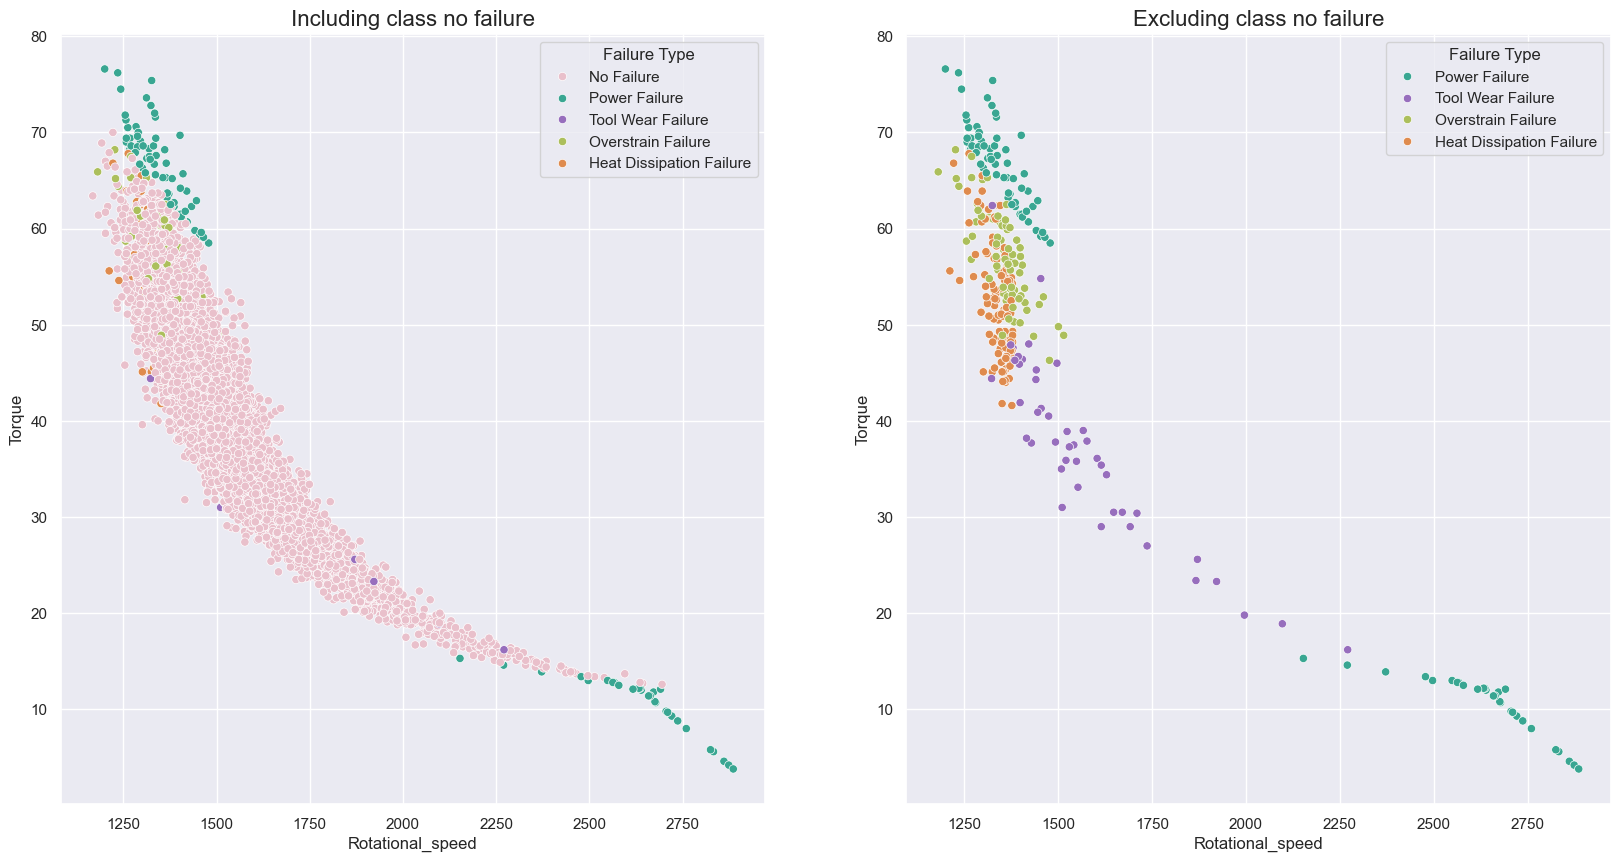

In [160]:
fig, ax = plt.subplots(1,2, figsize=[20,10])
plt.title('Rot. Speed vs Torque wrt Failure Type')
sns.scatterplot(data=df, x='Rotational_speed', y='Torque', hue='Failure Type', palette=['#E9C0CB', '#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'], ax=ax[0])
sns.scatterplot(data=df[df['Target'] == 1], x='Rotational_speed', y='Torque', hue='Failure Type', palette=['#39A692', '#976EBD', '#ACBF5C', '#DF8B4E'], ax=ax[1])

ax[0].set_title('Including class no failure')
ax[1].set_title('Excluding class no failure')

**Some insights:**
* Power failure happens both for lower and higher rotational speed/torque. It is the type of failure with the highest rotational speed (over 2500rpm) and lowest torque (below around 15Nm). In other others, above and below these thresholds only power failures occur. 
* Between torques 16Nm and 41Nm all failures are tool wear. 
* Overstrain failures take place with torques ranging from around 47 and 68Nm) and rotational speeds from 1200 to 1500rpm approximately.
* For heat dissipation failures, the torque range is smaller and the rotational speed range is bigger compared to overstrain failures.



<span style="color:#26488F; font-size:22px; font-weight: bold;">  Distribution </span> 

----- SKEWNESS ------------
Air_temperature skewness = 0.12
Process_temperature skewness = 0.02
Rotational_speed skewness = 1.99
Torque skewness = -0.01
Tool_wear skewness = 0.03
---------------------------


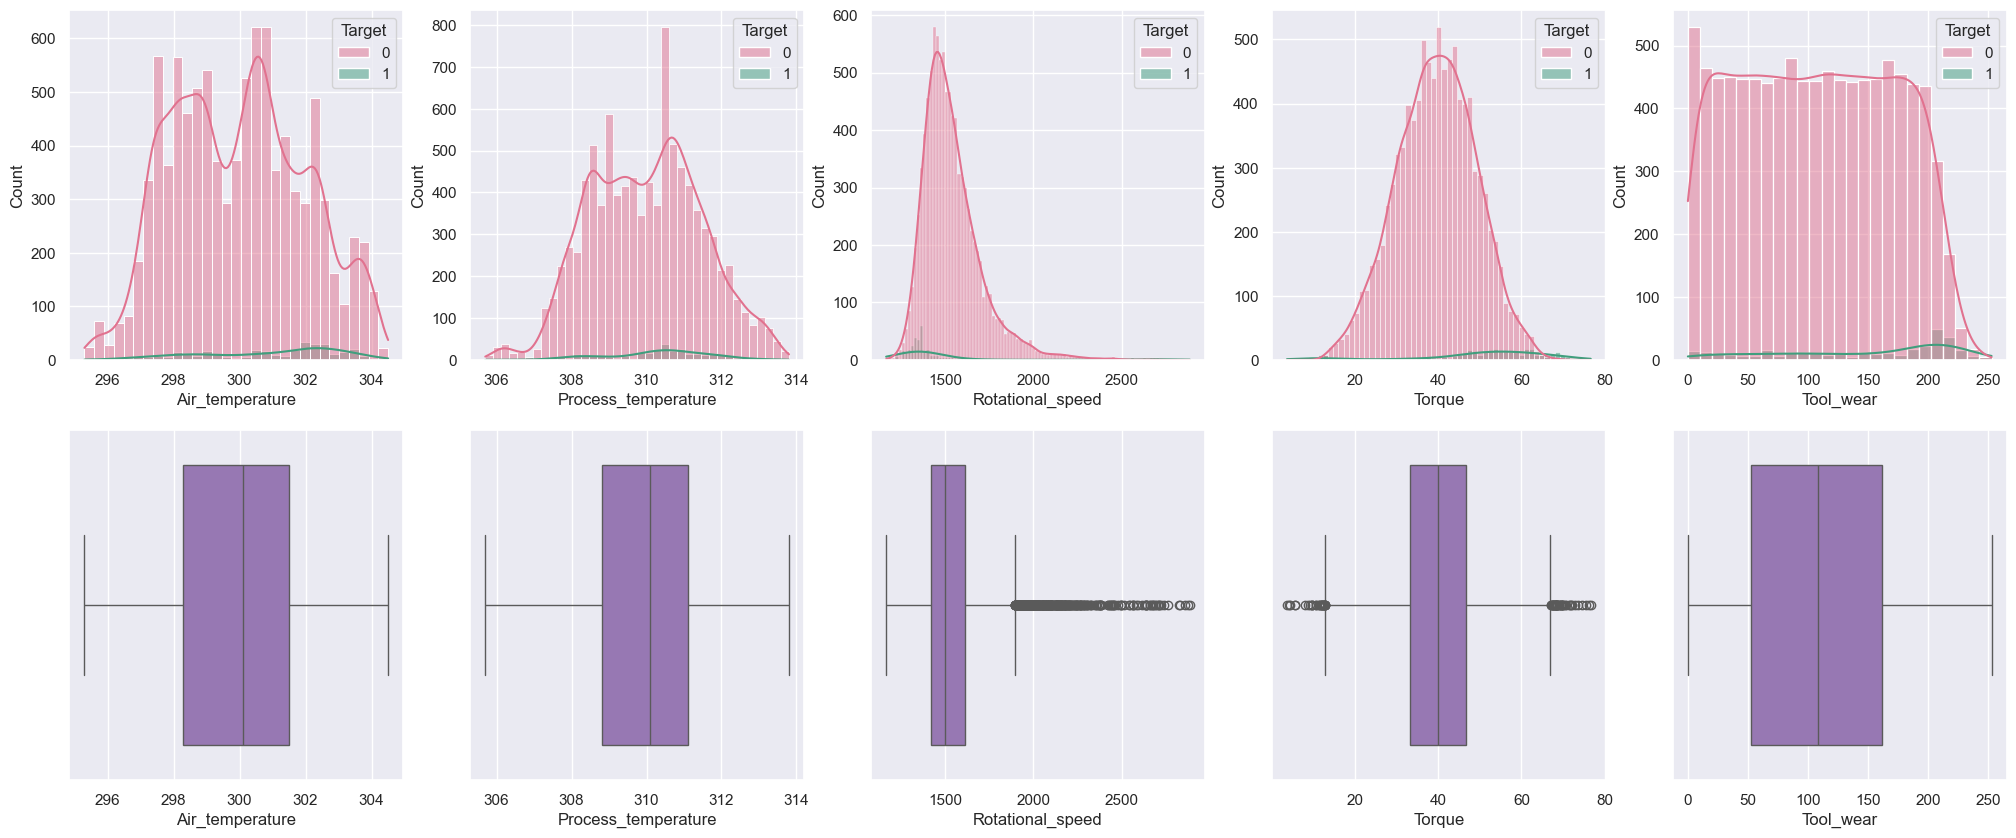

In [171]:
print('----- SKEWNESS ------------')
fig, axes = plt.subplots(2, 5, figsize=[25,10])
j = 0
colors = ['#E1728F', '#409E7D']

for i in ['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque', 'Tool_wear']:
    sns.histplot(data=df, x=i, kde=True, ax=axes[0,j], hue='Target', palette=colors)
    sns.boxplot(data=df, x=i, ax=axes[1,j], palette=['#976EBD'])
    j+=1
    print('{} skewness = {}'.format(i, round(df[i].skew(), 2)))
print('---------------------------')

**Insights**:

* Rotational speed is positively skewed.
* From the boxplots we can see that 'Rotational speed' and 'Torque' have outliers.

Let's check those potential 'outliers' by analyzing the boxplots:


In [179]:
# Function to calculate the maximum and minumum value from the boxplot
def maximum_box(x):
    Q1 = x.quantile(0.25)
    Q3 = x.quantile(0.75)
    IQR = Q3 - Q1
    maximum = Q3 + 1.5*IQR
    minimum = Q1 - 1.5*IQR
    return maximum, minimum

for i in ['L', 'M', 'H']:
    df_product_type = df[df['Type'] == i]
    max_rotational_speed, min_rotational_speed = maximum_box(df_product_type['Rotational_speed'])
    max_torque, min_torque = maximum_box(df_product_type['Torque'])
    print('Values from boxplot for type product ' + i + ':')
    print(f'Maximum torque value: {round(max_torque,2)}')
    print(f'Minimum torque value: {round(min_torque,2)}')
    print(f'Maximum rotational speed value: {round(max_rotational_speed,2)}')
    print(f'Minimum rotational speed value: {round(min_rotational_speed,2)}')
    print('='*20)

Values from boxplot for type product L:
Maximum torque value: 67.2
Minimum torque value: 12.8
Maximum rotational speed value: 1894.0
Minimum rotational speed value: 1142.0
Values from boxplot for type product M:
Maximum torque value: 67.05
Minimum torque value: 13.05
Maximum rotational speed value: 1895.75
Minimum rotational speed value: 1137.75
Values from boxplot for type product H:
Maximum torque value: 66.96
Minimum torque value: 12.66
Maximum rotational speed value: 1894.38
Minimum rotational speed value: 1143.38


**Insight:** The operational range for torque and rotational speed are similar for all product types.

Values above the maximum and below the minimum might be outliers, but not necessarily. 

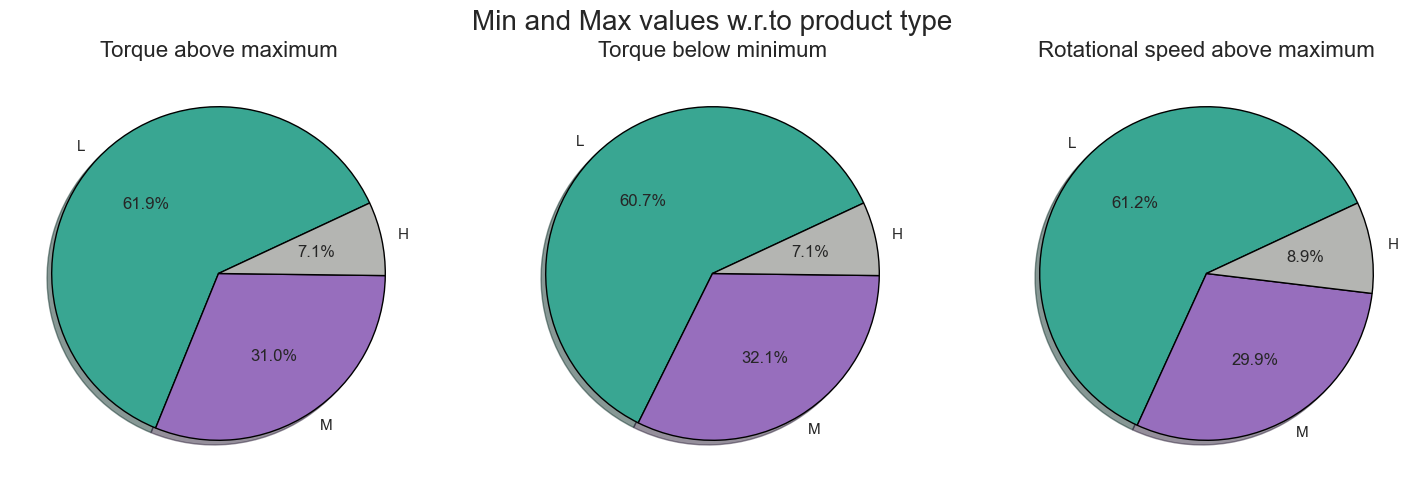

In [186]:
max_rotational_speed, min_rotational_speed = maximum_box(df['Rotational_speed'])
max_torque, min_torque = maximum_box(df['Torque'])

max_torque_values = df[df['Torque'] >= max_torque]['Type'].value_counts()  # Torque values above the boxplot maximum
min_torque_values = df[df['Torque'] <= min_torque]['Type'].value_counts()  # Torque values below the boxplot minimum
max_rotational_speed_values = df[df['Rotational_speed'] >= max_rotational_speed]['Type'].value_counts()  # Rotational spede values above the boxplot maximum

fig, axes = plt.subplots(1,3, figsize=[15,5])
fig.suptitle('Min and Max values w.r.to product type', fontsize=20)
plt.rcParams['axes.titlesize'] = 16
axes.flatten()
j=0
colors = ['#39A692', '#976EBD', '#B4B5B2']

for i in [max_torque_values, min_torque_values, max_rotational_speed_values]:
    axes[j].pie(i, labels=['L', 'M', 'H'], colors=colors,
        autopct='%1.1f%%', wedgeprops={'edgecolor': 'black'}, shadow=True, startangle=25)
    j+=1

axes[0].set_title('Torque above maximum')
axes[1].set_title('Torque below minimum')
axes[2].set_title('Rotational speed above maximum')
plt.tight_layout()

**Insight:** 

The values above the maximum and below the minimum are not highly correlated with the product type. The proportion of the pies is similar to the 60-30-10 proportion of the entire dataset.

However, there are proportionally slightly more values for L products and less for H across the three scenarios.

In [191]:
total_max_min_values = max_torque_values.sum() + min_torque_values.sum() + max_rotational_speed_values.sum()  # Total of instance under and above the minimum and maximum threshold from the boxplot, respectively.
ratio = total_max_min_values/df.shape[0]  # Percetange of these values with respect to the entire dataset
print('Percentage of values under and above the minimum and maximum threshold from the boxplot: {}'.format(ratio))

Percentage of values under and above the minimum and maximum threshold from the boxplot: 0.048932116715130855


**Insight:** 4.87% of the instances could be considered as ouliers using the boxplot method.

<span style="color:#26488F; font-size:36px; font-weight: bold;">  Data Preprocessing </span>

In [198]:
columns_failure_type = df['Failure Type'].unique().tolist()

In [200]:
columns_failure_type

['No Failure',
 'Power Failure',
 'Tool Wear Failure',
 'Overstrain Failure',
 'Heat Dissipation Failure']

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Ordinal Encoding </span>

In [217]:
df.columns

Index(['Air_temperature', 'Process_temperature', 'Rotational_speed', 'Torque',
       'Tool_wear', 'Target', 'Type', 'Failure Type'],
      dtype='object')

In [221]:
print(df['Type'].unique())  # Should show ['L', 'M', 'H'] or similar values
print(df['Failure Type'].unique())  # Should show unique values in 'Failure Type'


[1. 0. 2.]
[0. 1. 2. 3. 4.]


In [237]:
import pandas as pd
from sklearn.preprocessing import OrdinalEncoder

# Sample DataFrame (Replace this with your actual DataFrame initialization)
# df = pd.DataFrame({
#     'Type': ['1.0', '2.0', '0.0', '1.0', '2.0'],
#     'Failure Type': ['A', 'B', 'A', 'C', 'B']
# })

# Check if the DataFrame has been initialized and print its contents
print("DataFrame content:")
print(df)

# Step 1: Inspect DataFrame columns
print("DataFrame columns:")
print(df.columns.tolist())  # List of columns to see if 'Type' exists

# Step 2: Check data types and unique values
print("Data types:")
print(df.dtypes)

# If 'Type' is present, print unique values to understand what we're working with
if 'Type' in df.columns:
    print("Unique values in 'Type':", df['Type'].unique())
else:
    print("Column 'Type' does not exist in the DataFrame.")

# Proceed only if 'Type' exists
if 'Type' in df.columns:
    # Step 3: Handle unexpected values in the 'Type' column
    # Map numeric strings to categorical values (adjust according to your actual mappings)
    type_mapping = {
        '1.0': 'L',
        '2.0': 'M',
        '0.0': 'H'
    }

    # Step 4: Replace numeric strings with actual categories
    df['Type'] = df['Type'].replace(type_mapping)

    # Verify changes
    print("Updated unique values in 'Type':", df['Type'].unique())

    # Step 5: Check for null values
    print("Null values:")
    print(df.isnull().sum())

    # Fill or drop null values if any
    df.fillna(method='ffill', inplace=True)  # or use df.dropna(inplace=True)

    # Step 6: Convert all values to string type
    df['Type'] = df['Type'].astype(str)
    df['Failure Type'] = df['Failure Type'].astype(str)

    # Step 7: Create OrdinalEncoder for 'Type' column
    ord_enc_type = OrdinalEncoder(categories=[['L', 'M', 'H']])
    ord_enc_type.fit(df[['Type']])  # Fit the encoder
    df['Type_encoded'] = ord_enc_type.transform(df[['Type']])  # Transform the data

    # Step 8: Create OrdinalEncoder for 'Failure Type' column
    categories_failure_type = [df['Failure Type'].unique().tolist()]  # Unique values for 'Failure Type'
    ord_enc_failure = OrdinalEncoder(categories=categories_failure_type)
    ord_enc_failure.fit(df[['Failure Type']])  # Fit the encoder
    df['Failure_Type_encoded'] = ord_enc_failure.transform(df[['Failure Type']])  # Transform the data

    # Step 9: Drop original columns if needed
    df.drop(['Type', 'Failure Type'], axis=1, inplace=True)

    # Display the updated DataFrame
    df


DataFrame content:
      Air_temperature  Process_temperature  Rotational_speed  Torque  \
0               298.1                308.6              1551    42.8   
1               298.2                308.7              1408    46.3   
2               298.1                308.5              1498    49.4   
3               298.2                308.6              1433    39.5   
4               298.2                308.7              1408    40.0   
...               ...                  ...               ...     ...   
9968            298.8                308.4              1604    29.5   
9969            298.9                308.4              1632    31.8   
9970            299.0                308.6              1645    33.4   
9971            299.0                308.7              1408    48.5   
9972            299.0                308.7              1500    40.2   

      Tool_wear  Target  Type_encoded  Failure_Type_encoded  
0             0       0           0.0                 

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Scaling data </span>

Since 'Rotational_speed' and 'Torque' have some outliers, I am going to use RobustScaler:

In [248]:
import pandas as pd
from sklearn.preprocessing import MinMaxScaler

# Sample DataFrame initialization (Replace this with your actual DataFrame)
# df = pd.DataFrame({
#     'Air_temperature': [20, 21, 19, 22],
#     'Process_temperature': [25, 26, 24, 27],
#     'Tool_wear': [10, 11, 9, 12],
#     'Other_column': [1, 2, 3, 4]  # Example of an additional column
# })

# Step 1: Initialize df_scaled with the original DataFrame
df_scaled = df.copy()  # Create a copy of the original DataFrame to avoid modifying it directly

# Step 2: Define the columns to scale
columns = ['Air_temperature', 'Process_temperature', 'Tool_wear']

# Step 3: Create the scaler and fit-transform the specified columns
scaler = MinMaxScaler()
features_scaled = scaler.fit_transform(df[columns])

# Step 4: Create a new DataFrame with the scaled features
features_scaled = pd.DataFrame(features_scaled, columns=columns)

# Step 5: Drop the original columns from df_scaled and concatenate the new scaled features
df_scaled.drop(columns, axis=1, inplace=True)  # Remove original columns
df_scaled = pd.concat([df_scaled, features_scaled], axis=1)  # Combine with scaled features

# Step 6: Display the updated DataFrame
df_scaled


Rotational_speed  Torque  Target  Type_encoded  Failure_Type_encoded  \
0                 1551    42.8       0           0.0                   0.0   
1                 1408    46.3       0           2.0                   0.0   
2                 1498    49.4       0           2.0                   0.0   
3                 1433    39.5       0           2.0                   0.0   
4                 1408    40.0       0           2.0                   0.0   
...                ...     ...     ...           ...                   ...   
9968              1604    29.5       0           0.0                   0.0   
9969              1632    31.8       0           1.0                   0.0   
9970              1645    33.4       0           0.0                   0.0   
9971              1408    48.5       0           1.0                   0.0   
9972              1500    40.2       0           0.0                   0.0   

      Air_temperature  Process_temperature  Tool_wear  
0            0.304348             0.358025   0.000000  
1            0.315217             0.370370   0.011858  
2            0.304348             0.345679   0.019763  
3            0.315217             0.358025   0.027668  
4            0.315217             0.370370   0.035573  
...               ...                  ...        ...  
9968         0.380435             0.333333   0.055336  
9969         0.391304             0.333333   0.067194  
9970         0.402174             0.358025   0.086957  
9971         0.402174             0.370370   0.098814  
9972         0.402174             0.370370   0.118577  

[9973 rows x 8 columns]

<span style="color:#26488F; font-size:28px; font-weight: bold;">  Modeling with 'Target' variable </span>

As the dataset is unbalanced, I am going to used macro f1 score and ROC AUC score to assess model performance.

First, let's build a model with 'Target'. Hence, we need to remove the other target 'Failure Type' to avoid data leakage.

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Stratified Split </span>

In [266]:
X = df_scaled.drop(['Target', 'Failure_Type_encoded'], axis=1)
y = df_scaled['Target']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

print('Checking the stratified split...')
print('Target proportion in original dataset:')
print(df['Target'].value_counts(normalize=True))

print('Target proportion in y_train dataset:')
print(y_train.value_counts(normalize=True))

print('Target proportion in y_test dataset:')
y_test.value_counts(normalize=True)

Checking the stratified split...
Target proportion in original dataset:
Target
0    0.966911
1    0.033089
Name: proportion, dtype: float64
Target proportion in y_train dataset:
Target
0    0.966974
1    0.033026
Name: proportion, dtype: float64
Target proportion in y_test dataset:


Target
0    0.96672
1    0.03328
Name: proportion, dtype: float64

The proportions are similar. Therefore, it was correctly splitted.

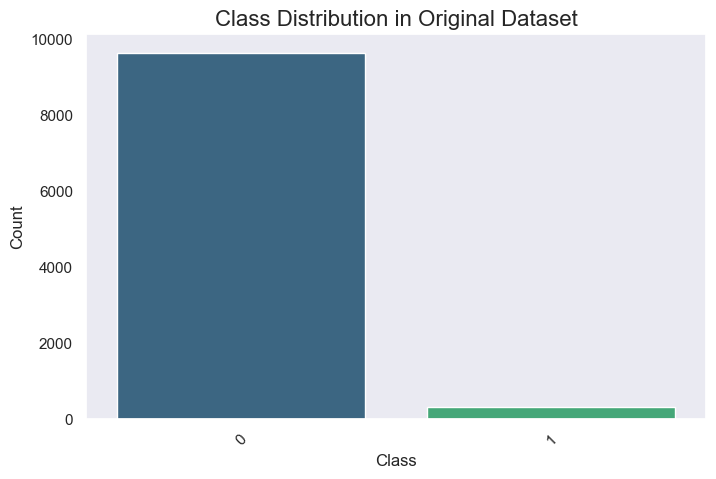

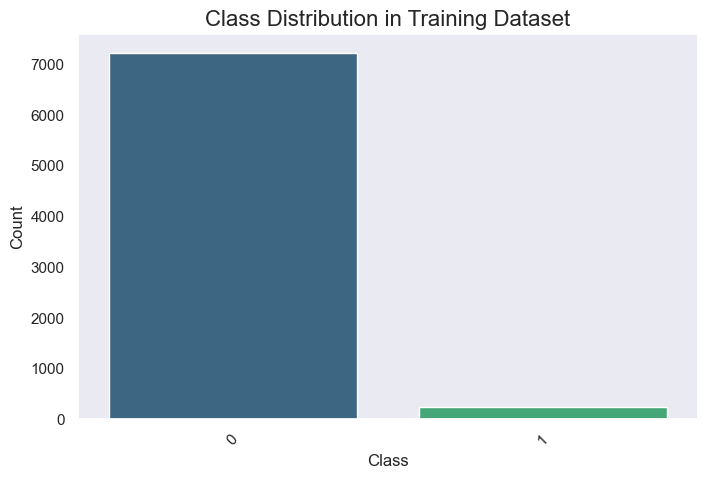

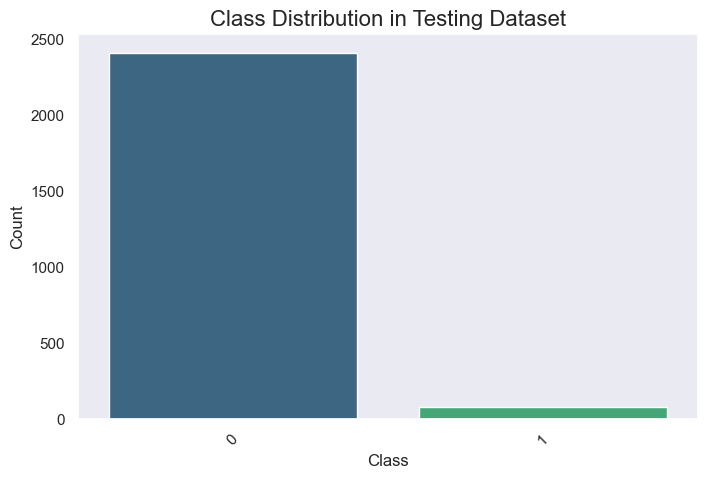

In [269]:
# Function to plot class distribution
def plot_class_distribution(df, title):
    plt.figure(figsize=(8, 5))
    sns.countplot(data=df, x='Target', palette='viridis')
    plt.title(title)
    plt.xlabel('Class')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.grid(axis='y')
    plt.show()

# Visualizing the original dataset
plot_class_distribution(df, 'Class Distribution in Original Dataset')

# Visualizing the training dataset
y_train_df = y_train.reset_index()  # Reset index to create a DataFrame
y_train_df.columns = ['Index', 'Target']  # Rename columns for plotting
plot_class_distribution(y_train_df, 'Class Distribution in Training Dataset')

# Visualizing the test dataset
y_test_df = y_test.reset_index()  # Reset index to create a DataFrame
y_test_df.columns = ['Index', 'Target']  # Rename columns for plotting
plot_class_distribution(y_test_df, 'Class Distribution in Testing Dataset')


<span style="color:#26488F; font-size:22px; font-weight: bold;">  Balanced Models </span>

Fitting BalancedRandomForestClassifier(n_jobs=-1, random_state=42)
Cross val roc auc test data: 0.9792
Cross val macro f1 score test data: 0.616
Cross val macro precision score test data: 0.6038
Cross val macro recall score test data: 0.873

Fitting BalancedBaggingClassifier(n_jobs=-1, random_state=42)
Cross val roc auc test data: 0.9728
Cross val macro f1 score test data: 0.6778
Cross val macro precision score test data: 0.6358
Cross val macro recall score test data: 0.8669

Fitting RUSBoostClassifier(random_state=42)
Cross val roc auc test data: 0.8559
Cross val macro f1 score test data: 0.6117
Cross val macro precision score test data: 0.6119
Cross val macro recall score test data: 0.7149

Fitting EasyEnsembleClassifier(random_state=42)
Cross val roc auc test data: 0.9639
Cross val macro f1 score test data: 0.6215
Cross val macro precision score test data: 0.6037
Cross val macro recall score test data: 0.834



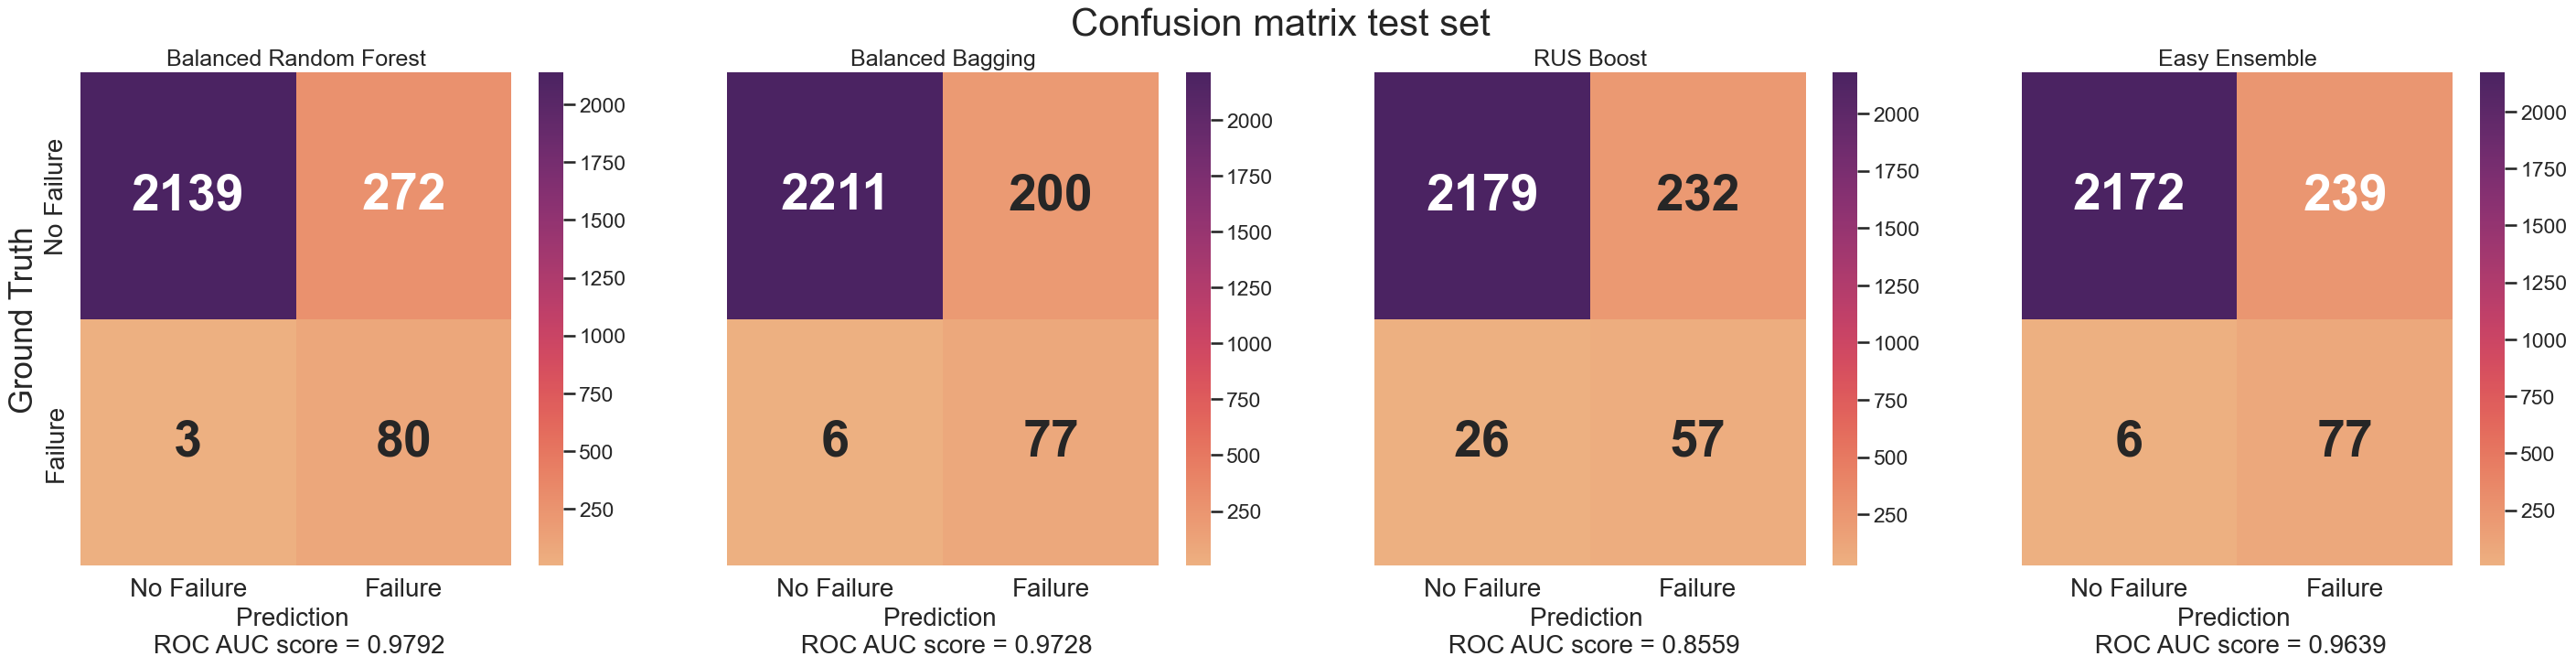

f1  roc_auc
BalancedBaggingClassifier       0.6778   0.9728
EasyEnsembleClassifier          0.6215   0.9639
BalancedRandomForestClassifier  0.6160   0.9792
RUSBoostClassifier              0.6117   0.8559

In [274]:
from sklearn.model_selection import cross_validate

brfc = BalancedRandomForestClassifier(random_state=42, n_jobs=-1)
bbc = BalancedBaggingClassifier(random_state=42, n_jobs=-1)
RUSB = RUSBoostClassifier(random_state=42)
EEC = EasyEnsembleClassifier(random_state=42)

fig, axes = plt.subplots(1, 4, figsize=[35,7])
fig.suptitle('Confusion matrix test set', fontsize=30)
axes.flatten()
j=0

results_df = pd.DataFrame()

for model in [brfc, bbc, RUSB, EEC]:
    print('Fitting', model)
    model = model.fit(X_train, y_train)

    # Cross validation metrics test data
    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25, random_state=42)
    y_pred = model.predict(X_test)
    scoring = ["f1_macro", "precision_macro", "recall_macro"]
    cross_val_scores = cross_validate(model, X, y, scoring=scoring)
    roc_auc_test_cv = round(cross_val_score(model, X, y, cv=cv, n_jobs=-1, scoring="roc_auc").mean(),4)
    f1_test_cv = round(cross_val_scores["test_f1_macro"].mean(),4)
    precision_test_cv = round(cross_val_scores["test_precision_macro"].mean(),4)
    recall_test_cv = round(cross_val_scores["test_recall_macro"].mean(),4)
    
    # Summary table
    score_df = pd.DataFrame({
                     'f1': round(cross_val_scores["test_f1_macro"].mean(),4),
                     'roc_auc': roc_auc_test_cv},
                     index=[str(model).split('(')[0]])

    results_df = pd.concat([results_df, score_df])

    # Print metrics
    print(f'Cross val roc auc test data: {roc_auc_test_cv}')
    print(f'Cross val macro f1 score test data: {round(cross_val_scores["test_f1_macro"].mean(),4)}')
    print(f'Cross val macro precision score test data: {round(cross_val_scores["test_precision_macro"].mean(),4)}')
    print(f'Cross val macro recall score test data: {round(cross_val_scores["test_recall_macro"].mean(),4)}')
    print()
    
    # Confusion matrix test data
    sns.set_context('talk')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=axes[j])

    labels = ['No Failure', 'Failure']
    axes[j].set_xticklabels(labels, fontsize=20)
    axes[j].set_yticklabels(['',''], fontsize=20)
    axes[j].set_xlabel('Prediction \n ROC AUC score = ' + str(roc_auc_test_cv), fontsize=20)
    j += 1

axes[0].set_yticklabels(labels, fontsize=20)
axes[0].set_ylabel('Ground Truth', fontsize=25)
axes[0].set_title('Balanced Random Forest')
axes[1].set_title('Balanced Bagging')
axes[2].set_title('RUS Boost')
axes[3].set_title('Easy Ensemble')
plt.show()

results_df = results_df.sort_values(by='f1', ascending=False)
results_df.round(4)

All results are using cross validation:
- **Balanced Bagging is the best overall model**, with highest f1 score and second highest roc auc.
- Balanced Random Forest has a slightly highest roc auc than Balanced Bagging, but its f1 score is lower.
- Easy Ensemble has a high roc auc thant Balance Bagging, but very low f1 score.

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Over and undersampling with Random Forest and Bagging classifiers (Random Search) </span>

Now, let's try using different sampling techniques with random forest and balanced bagging to see if we achieve better performance than the balanced models:

In [278]:
RdFo = RandomForestClassifier(random_state=42, criterion='entropy')
bbc = BaggingClassifier(random_state=42, n_jobs=-1)

OverSamp_1 = RandomOverSampler(random_state=42)
OverSamp_2 = SMOTE(random_state=42, n_jobs=-1)
OverSamp_3 = BorderlineSMOTE(random_state=42, n_jobs=-1)
OverSamp_4 = ClusterCentroids(random_state=42)
OverSamp_5 = TomekLinks(n_jobs=-1)
OverSamp_6 = NearMiss(version=3, n_jobs=-1)

results_df = pd.DataFrame()

OverSamp_list = [OverSamp_1, OverSamp_2, OverSamp_3, OverSamp_4, OverSamp_5, OverSamp_6]

for model in [RdFo, bbc]:
    if model == RdFo:
        grid_param = {'n_estimators': np.arange(10, 160,10),
                       'max_depth': np.arange(10, 110, 10),
                       'min_samples_split': [2, 5, 10]}
        
    else:
        grid_param = {'n_estimators': np.arange(10, 160,10)}
                      
    for samp in OverSamp_list:
        X_train_resampled, y_train_resampled = samp.fit_resample(X_train, y_train)

        random_search = RandomizedSearchCV(model, grid_param, cv=3, n_jobs=-1, scoring=['f1_macro', 'roc_auc'], refit='f1_macro', random_state=42)
        random_search.fit(X_train_resampled, y_train_resampled)
        y_pred = random_search.predict(X_test)
        score_df = pd.DataFrame({'model': str(model).split('(')[0],
                             'f1': f1_score(y_test, y_pred, average="macro"),
                             'auc': roc_auc_score(y_test, y_pred)},
                             index=[str(samp).split('(')[0]])

        params_df = pd.DataFrame(random_search.best_params_, index=[str(samp).split('(')[0]])
        params_df = pd.concat([score_df, params_df], axis=1)
        results_df = pd.concat([results_df, params_df])

results_df = results_df.sort_values(by='f1', ascending=False)
results_df.round(4)

model      f1     auc  n_estimators  \
TomekLinks              BaggingClassifier  0.9157  0.8843           120   
RandomOverSampler  RandomForestClassifier  0.8873  0.8536            30   
TomekLinks         RandomForestClassifier  0.8631  0.8062           110   
RandomOverSampler       BaggingClassifier  0.8408  0.8270            20   
BorderlineSMOTE    RandomForestClassifier  0.8280  0.8989           110   
SMOTE              RandomForestClassifier  0.8050  0.9016           110   
BorderlineSMOTE         BaggingClassifier  0.7908  0.8606            20   
SMOTE                   BaggingClassifier  0.7822  0.8816            60   
NearMiss           RandomForestClassifier  0.6790  0.8972           130   
NearMiss                BaggingClassifier  0.6670  0.8565           120   
ClusterCentroids   RandomForestClassifier  0.1602  0.5645           110   
ClusterCentroids        BaggingClassifier  0.0988  0.5286           100   

                   min_samples_split  max_depth  
TomekLinks                       NaN        NaN  
RandomOverSampler                2.0      100.0  
TomekLinks                       2.0      100.0  
RandomOverSampler                NaN        NaN  
BorderlineSMOTE                  2.0      100.0  
SMOTE                            2.0      100.0  
BorderlineSMOTE                  NaN        NaN  
SMOTE                            NaN        NaN  
NearMiss                         5.0       30.0  
NearMiss                         NaN        NaN  
ClusterCentroids                 2.0      100.0  
ClusterCentroids                 NaN        NaN

- Overall, the models have lower roc auc score, but **much higher f1 score**. 
- Tomek's links undersampling on a bagging model had the highest f1 score.
- Bagging classifier using cluster centroids sampling had the highest roc auc score, but the f1 score was too low. 
- In my opinion, Random Forest with Borderline SMOTE have an equilimbrium between f1 roc auc score.

**My takeaway**: the macro f1 score improve dramatically using these sampling techniques! These models might be better compared to the balanced ones 🙃

From now on, I will continue with these two models and the balanced bagging one as well as I will make comparisons between them.

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Train chosen models </span>

Let's train a bagging classifier using tomek's links undersampling and a random forest with borderline smote oversampling:

In [282]:
# Bagging Tomek's links undersampling
tomeklinks= TomekLinks(n_jobs=-1)
bag_model = BaggingClassifier(n_estimators=120, random_state=42, n_jobs=-1)
X_train_resampled, y_train_resampled = tomeklinks.fit_resample(X_train, y_train)
bag_model = bag_model.fit(X_train_resampled, y_train_resampled)

# Random forest with borderling oversampling
borderline = BorderlineSMOTE(random_state=42, n_jobs=-1)
rf_model = RandomForestClassifier(n_estimators=110, min_samples_split=2, max_depth=100, random_state=42, criterion='entropy')
X_train_resampled, y_train_resampled = borderline.fit_resample(X_train, y_train)
rf_model = rf_model.fit(X_train_resampled, y_train_resampled)

In [286]:
bag_model

BaggingClassifier(n_estimators=120, n_jobs=-1, random_state=42)

In [284]:
rf_model

RandomForestClassifier(criterion='entropy', max_depth=100, n_estimators=110,
                       random_state=42)

<span style="color:#26488F; font-size:18px; font-weight: bold;">  Grid Search Balanced Bagging </span>

In [289]:
balanced_bagging_model = BalancedBaggingClassifier(random_state=42, n_jobs=-1)

params = {'n_estimators': range(5,20),
         }
grid_search = GridSearchCV(bbc, params, scoring='f1_macro', cv=3,
                             n_jobs=-1)

grid_search = grid_search.fit(X_train, y_train)

# Best parameters from random search
print(grid_search.best_params_)

# Roc auc score on test set
y_pred_bbc = grid_search.predict(X_test)
print(f'Macro f1 test set: {round(f1_score(y_test, y_pred_bbc, average="macro"),4)}')
print(f'ROC AUC test set: {round(roc_auc_score(y_test, y_pred_bbc),4)}')

{'n_estimators': 17}
Macro f1 test set: 0.9038
ROC AUC test set: 0.8662


# Let's train the final model

In [292]:

bal_bag_model = BalancedBaggingClassifier(n_estimators=10, random_state=42, n_jobs=-1)
bal_bag_model = bal_bag_model.fit(X_train, y_train)

In [294]:
bal_bag_model

BalancedBaggingClassifier(n_jobs=-1, random_state=42)

<span style="color:#26488F; font-size:18px; font-weight: bold;">  Classification report </span>

Let's print out the classification report for every model:

In [299]:
y_pred_bag = bag_model.predict(X_test)
y_pred_rf = rf_model.predict(X_test)
y_pred_bal_bag = bal_bag_model.predict(X_test)

print('Classification report Bagging Tomek Links')
print(classification_report(y_test, y_pred_bag))
print('-'*53)

print('Classification report Random Forest Borderline SMOTE')
print(classification_report(y_test, y_pred_rf))
print('-'*53)

print('Classification report Balanced Bagging')
print(classification_report(y_test, y_pred_bal_bag))


Classification report Bagging Tomek Links
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2411
           1       0.91      0.77      0.84        83

    accuracy                           0.99      2494
   macro avg       0.95      0.88      0.92      2494
weighted avg       0.99      0.99      0.99      2494

-----------------------------------------------------
Classification report Random Forest Borderline SMOTE
              precision    recall  f1-score   support

           0       0.99      0.98      0.99      2411
           1       0.57      0.82      0.67        83

    accuracy                           0.97      2494
   macro avg       0.78      0.90      0.83      2494
weighted avg       0.98      0.97      0.98      2494

-----------------------------------------------------
Classification report Balanced Bagging
              precision    recall  f1-score   support

           0       1.00      0.92      0.96      

It can be seen that the Bagging Tomek Links has the higest macro f1 score. 

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Confusion matrix </span>

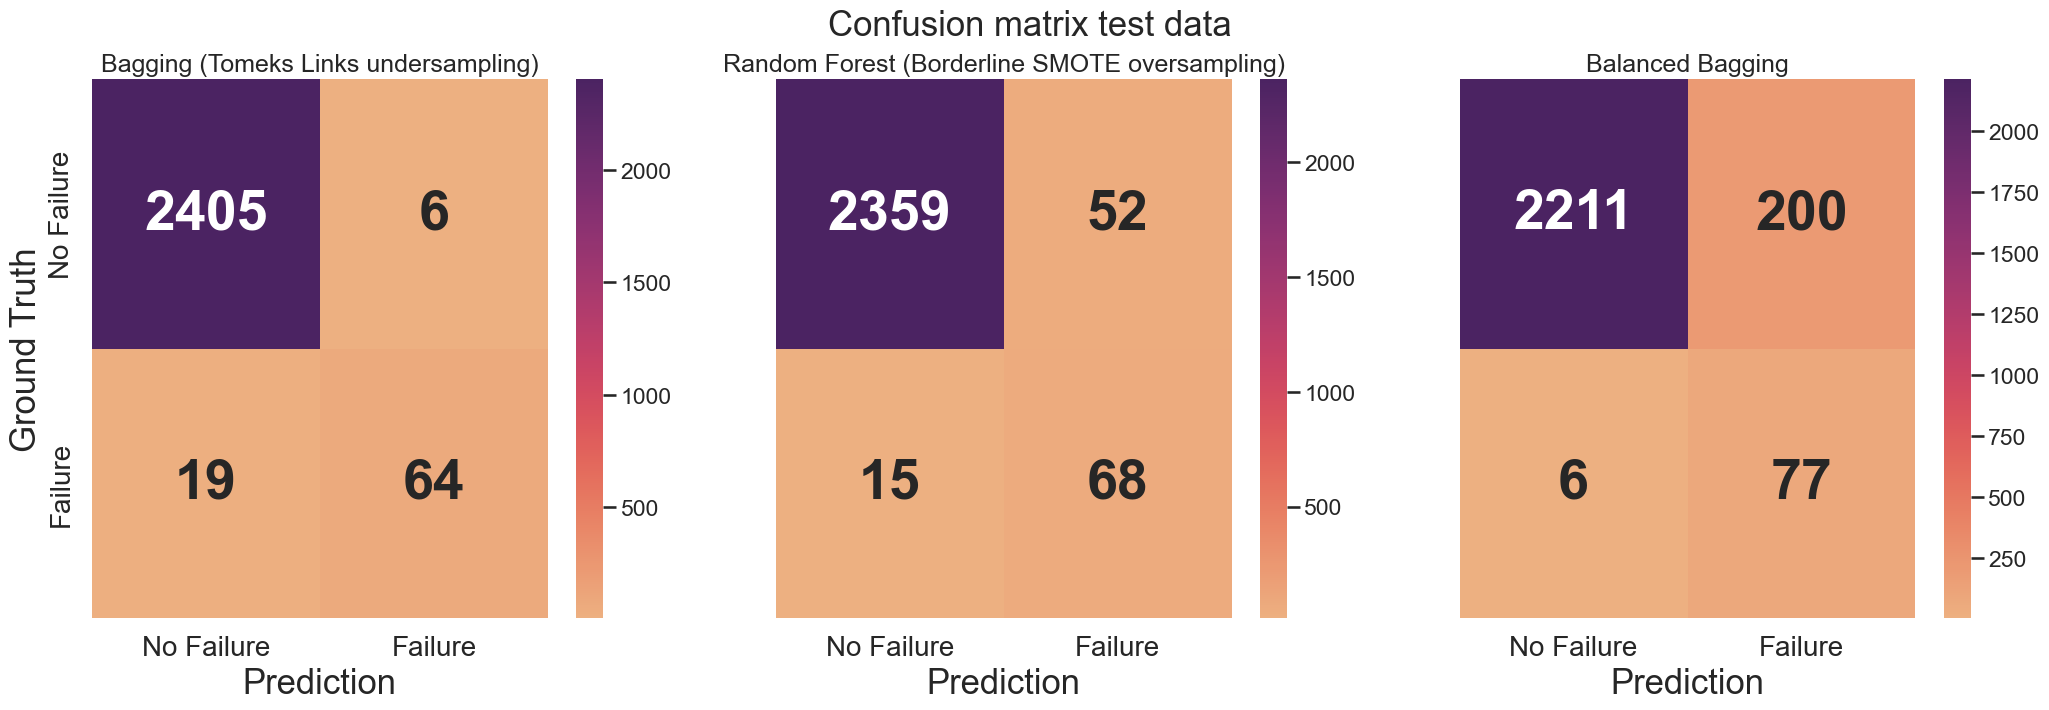

In [303]:
fig, axes = plt.subplots(1, 3, figsize=[25,7])
fig.suptitle('Confusion matrix test data', fontsize=25)
axes.flatten()
j=0

for model in [bag_model, rf_model, bal_bag_model]:
    y_pred = model.predict(X_test)
    # Confusion matrix test data
    sns.set_context('talk')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=axes[j])

    labels = ['No Failure', 'Failure']
    axes[j].set_xticklabels(labels, fontsize=20)
    axes[j].set_yticklabels(['',''], fontsize=20)
    axes[j].set_xlabel('Prediction', fontsize=25)
    j += 1

axes[0].set_yticklabels(labels, fontsize=20)
axes[0].set_ylabel('Ground Truth', fontsize=25)
axes[0].set_title('Bagging (Tomeks Links undersampling)')
axes[1].set_title('Random Forest (Borderline SMOTE oversampling)')
axes[2].set_title('Balanced Bagging')
plt.show()

- The current bagging tomek links model does a better job at classifying overall. However, the recall score is low. Consequently, it missed a lot failures (it misclassified 21 failures as no failures).
- The current balanced bagging has a much higher recall; hence it is able to predict almost every failure. However, it has many false positives (it predicted failure 201 times when the machinery was actually working well).

`So, what to do next? We can check the roc-auc and precision-recall curves and play around with the decision threshold.`

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Roc and precision-recall curves </span>


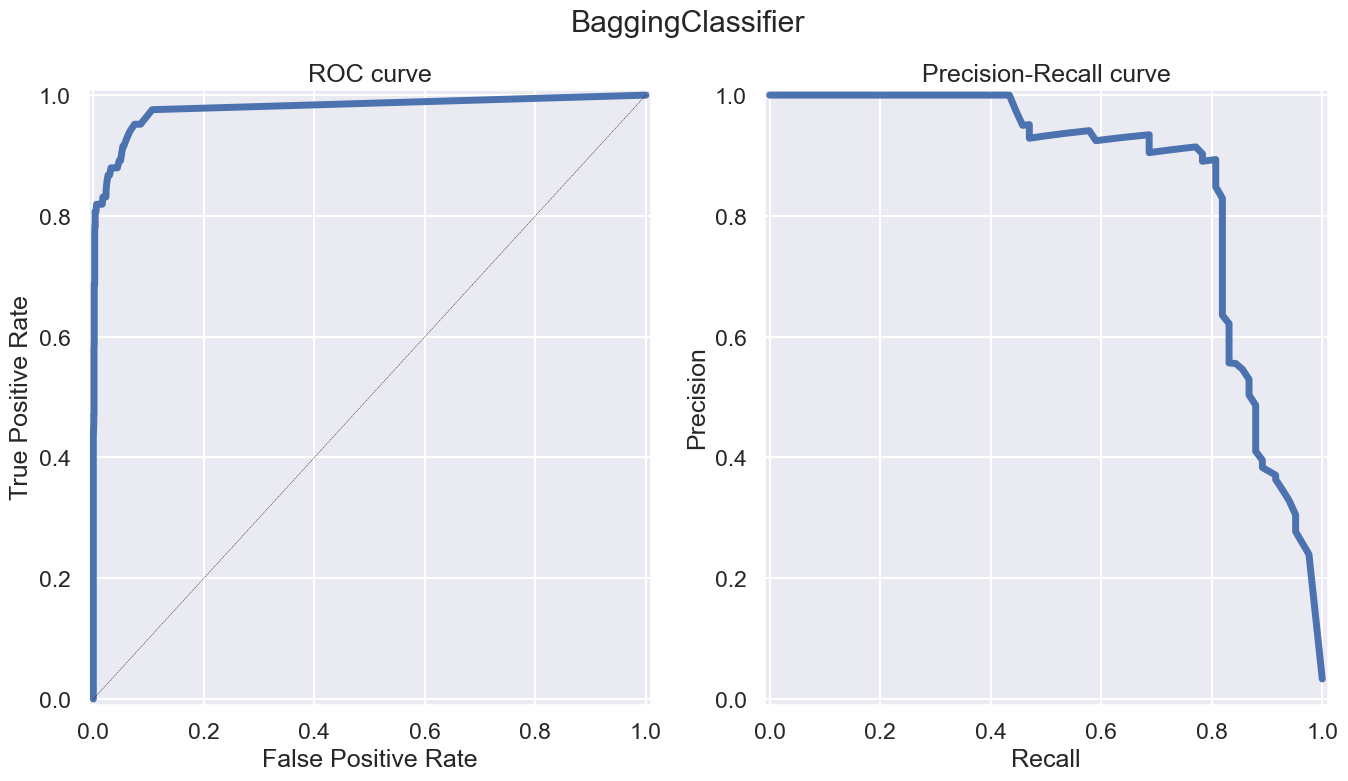

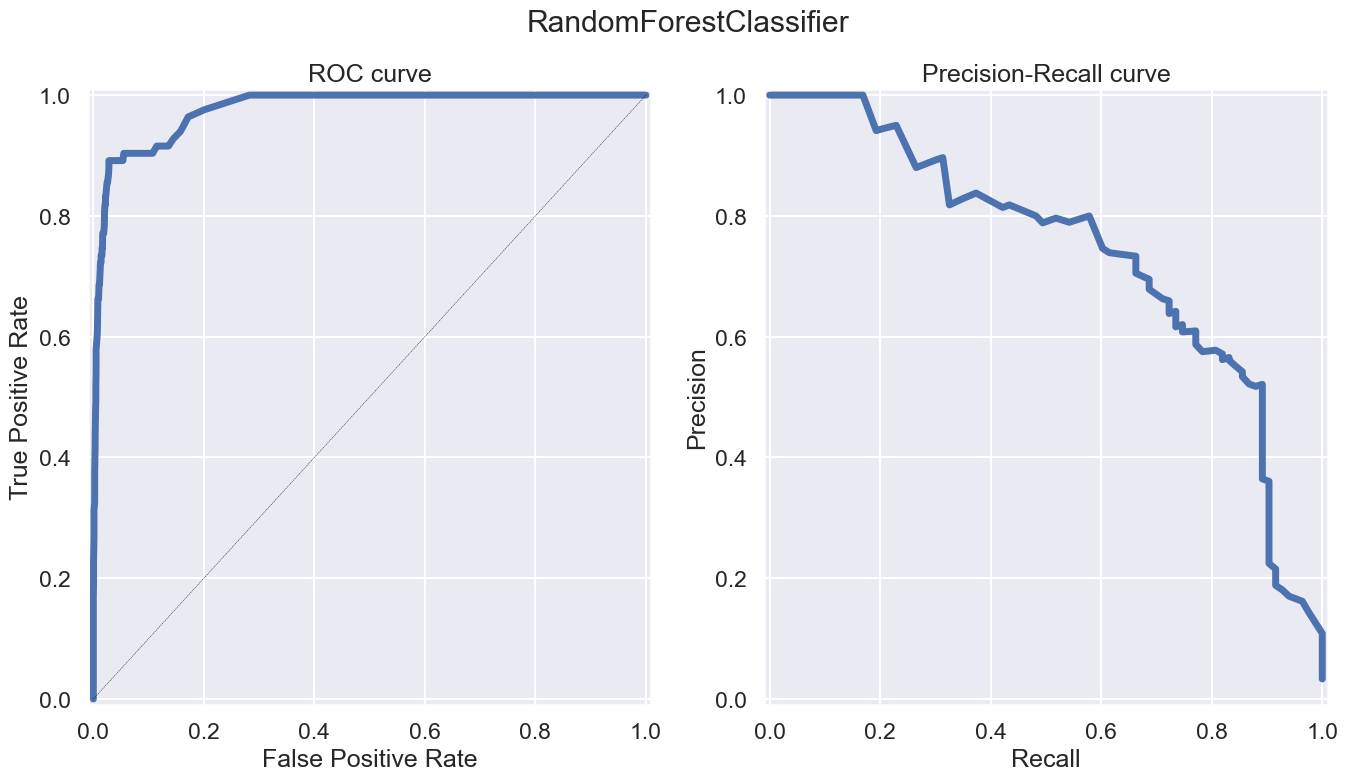

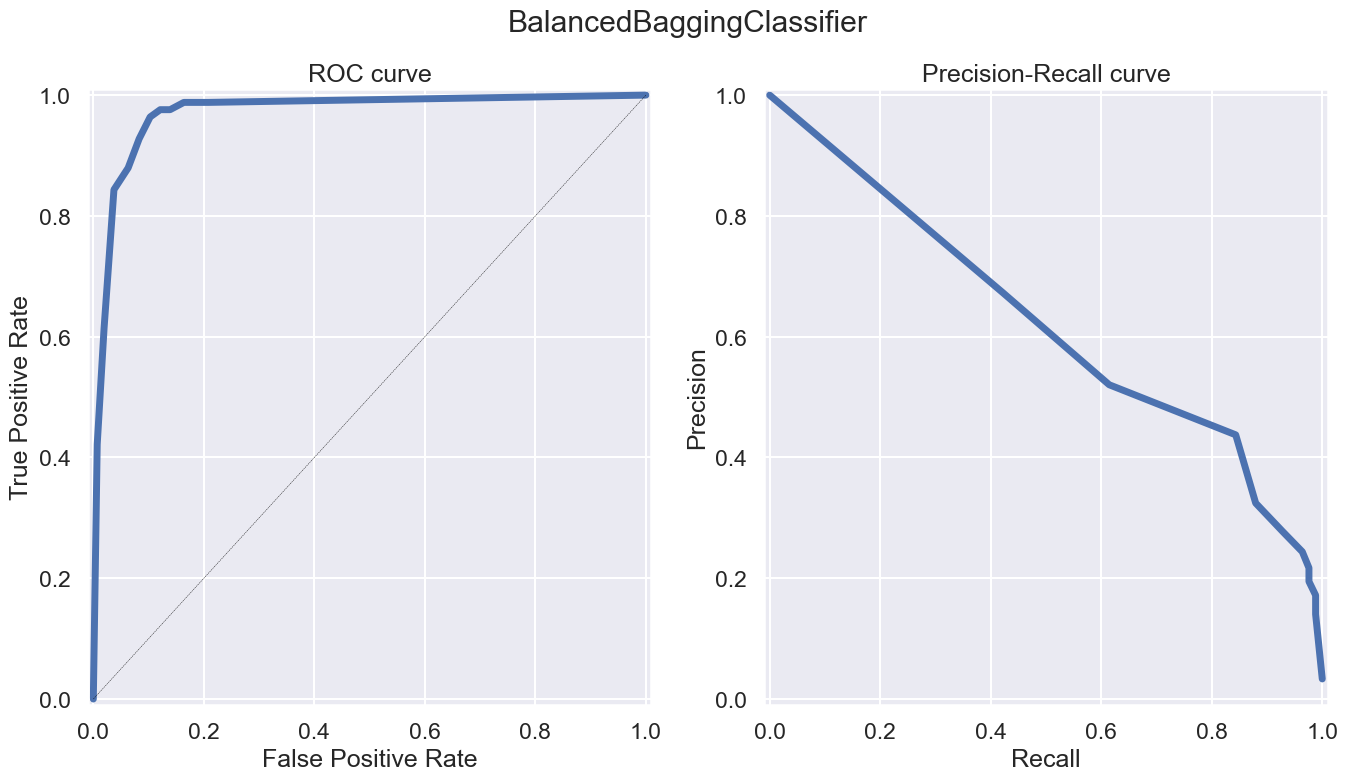

In [308]:
# Roc curve
def roc_prec_recall_curves(model):
    fig, axList = plt.subplots(ncols=2)
    fig.set_size_inches(16, 8)

    y_prob = model.predict_proba(X_test)

    # ROC-AUC curve
    ax = axList[0]
    fpr, tpr, thresholds = roc_curve(y_test, y_prob[:,1])
    ax.plot(fpr, tpr, linewidth=5)
    ax.plot([0, 1], [0, 1], ls='--', color='black', lw=.3)
    ax.set(xlabel='False Positive Rate',
           ylabel='True Positive Rate',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='ROC curve')
    ax.grid(True)

    # Precision-recall curve
    ax = axList[1]
    precision, recall, _ = precision_recall_curve(y_test, y_prob[:,1])
    ax.plot(recall, precision, linewidth=5)
    ax.set(xlabel='Recall', ylabel='Precision',
           xlim=[-.01, 1.01], ylim=[-.01, 1.01],
           title='Precision-Recall curve')
    ax.grid(True)
    plt.suptitle(str(model).split('(')[0])
    
roc_prec_recall_curves(bag_model)
roc_prec_recall_curves(rf_model)
roc_prec_recall_curves(bal_bag_model)
plt.show()

Those plots are using a decision threshold of 0.5 when classiying. As mentioned before, we can play with this number to get a higher recall or precision, considering that there is always a trade-off between them. Let's do that:

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Precision-Recall wrt decision threshold </span>

First, let's check the classification report of the bagigng tomek links model once again:

In [318]:
# Classification report
print(classification_report(y_test, y_pred_bag))

              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2411
           1       0.91      0.77      0.84        83

    accuracy                           0.99      2494
   macro avg       0.95      0.88      0.92      2494
weighted avg       0.99      0.99      0.99      2494



* With this model, for the minority class (failure) we obtain a recall of 0.75 and a precision of 0.91. The algorithm classifies using a threshold of 0.5, meaning that if the probability of a certain instance of being class 1 (failure) is 0.51, it will be classied as failure. On the other hand, if it is less than 0.5 it will be classify as not failure.

* We can change this threshold to obtain higher recall or precision scores, depending on what we are trying to achieve. For instace, setting a decision threshold at 0.6 would decrease recall and increase precision, and viceversa.

* In the curves below, we can see the trade off between recall and precision (for failure class) by changing the decision threshold.

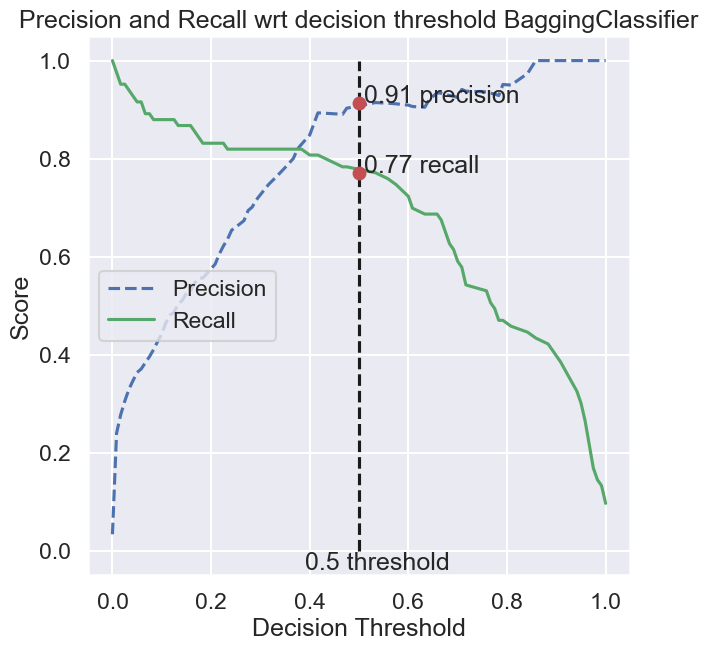

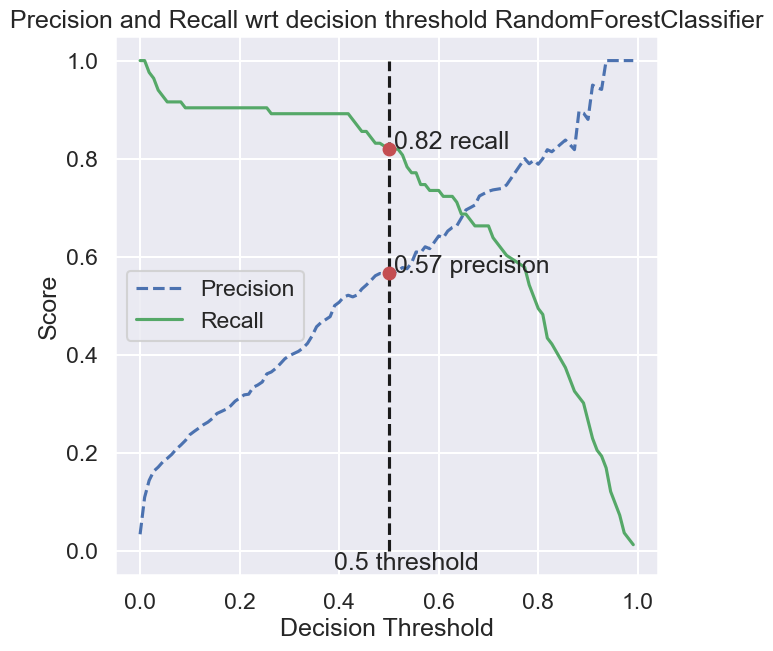

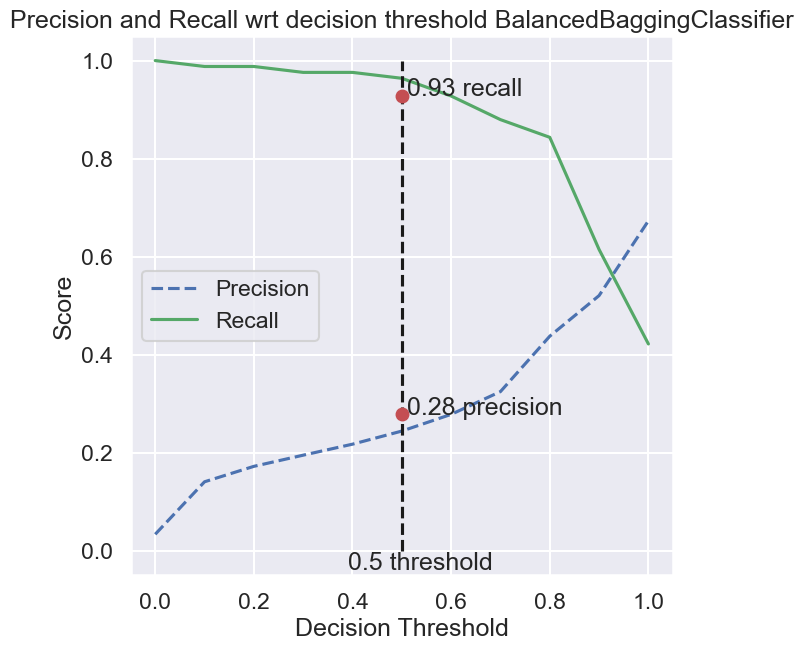

In [322]:
def plot_precision_recall_threshold(model):
    y_pred = model.predict_proba(X_test)[:,1]
    precisions, recalls, thresholds = precision_recall_curve(y_test, y_pred)
    
    plt.figure(figsize=(7, 7))
    plt.title("Precision and Recall wrt decision threshold " + str(model).split('(')[0])
    plt.plot(thresholds, precisions[:-1], "b--", label="Precision")
    plt.plot(thresholds, recalls[:-1], "g-", label="Recall")
    plt.plot([0.5, 0.5], [0, 1], 'k--')
    plt.ylabel("Score")
    plt.xlabel("Decision Threshold")
    plt.legend(loc='center left')
    
    y_pred = model.predict(X_test)
    metrics = precision_recall_fscore_support(y_test, y_pred)
    precision = metrics[0][1]
    recall = metrics[1][1]
    
    # Precision score at 0.5 threshold
    plt.plot(0.5, precision, 'or')
    plt.annotate(f'{precision:.2f} precision', (0.51, precision))
    # Recall score at 0.5 threshold
    plt.plot(0.5, recall, 'or')
    plt.annotate(f'{recall:.2f} recall', (0.51, recall))
    plt.annotate('0.5 threshold', (0.39, -0.04))

plot_precision_recall_threshold(bag_model)
plot_precision_recall_threshold(rf_model)
plot_precision_recall_threshold(bal_bag_model)

plt.show()

- In the bagging tomeks links moel, with a default 0.5 threshold, we obtain a 0.75 recall and 0.91 precision score, just as seen in the classification report above. 
- In the Balanced Bagging, with a 0.5 decision threshold, we obtain a much higher recall (0.96), but lower precision (0.28).


`We can move the decision threshold to achieve the desired trade-off of precision-recall. Since we are trying to predict machine failure, the minority class (class failure) should be more important. Hence, we aim at higher recall at the expense of lower precision. In my opinion, it is better to have some false positives than not predict a failure.`

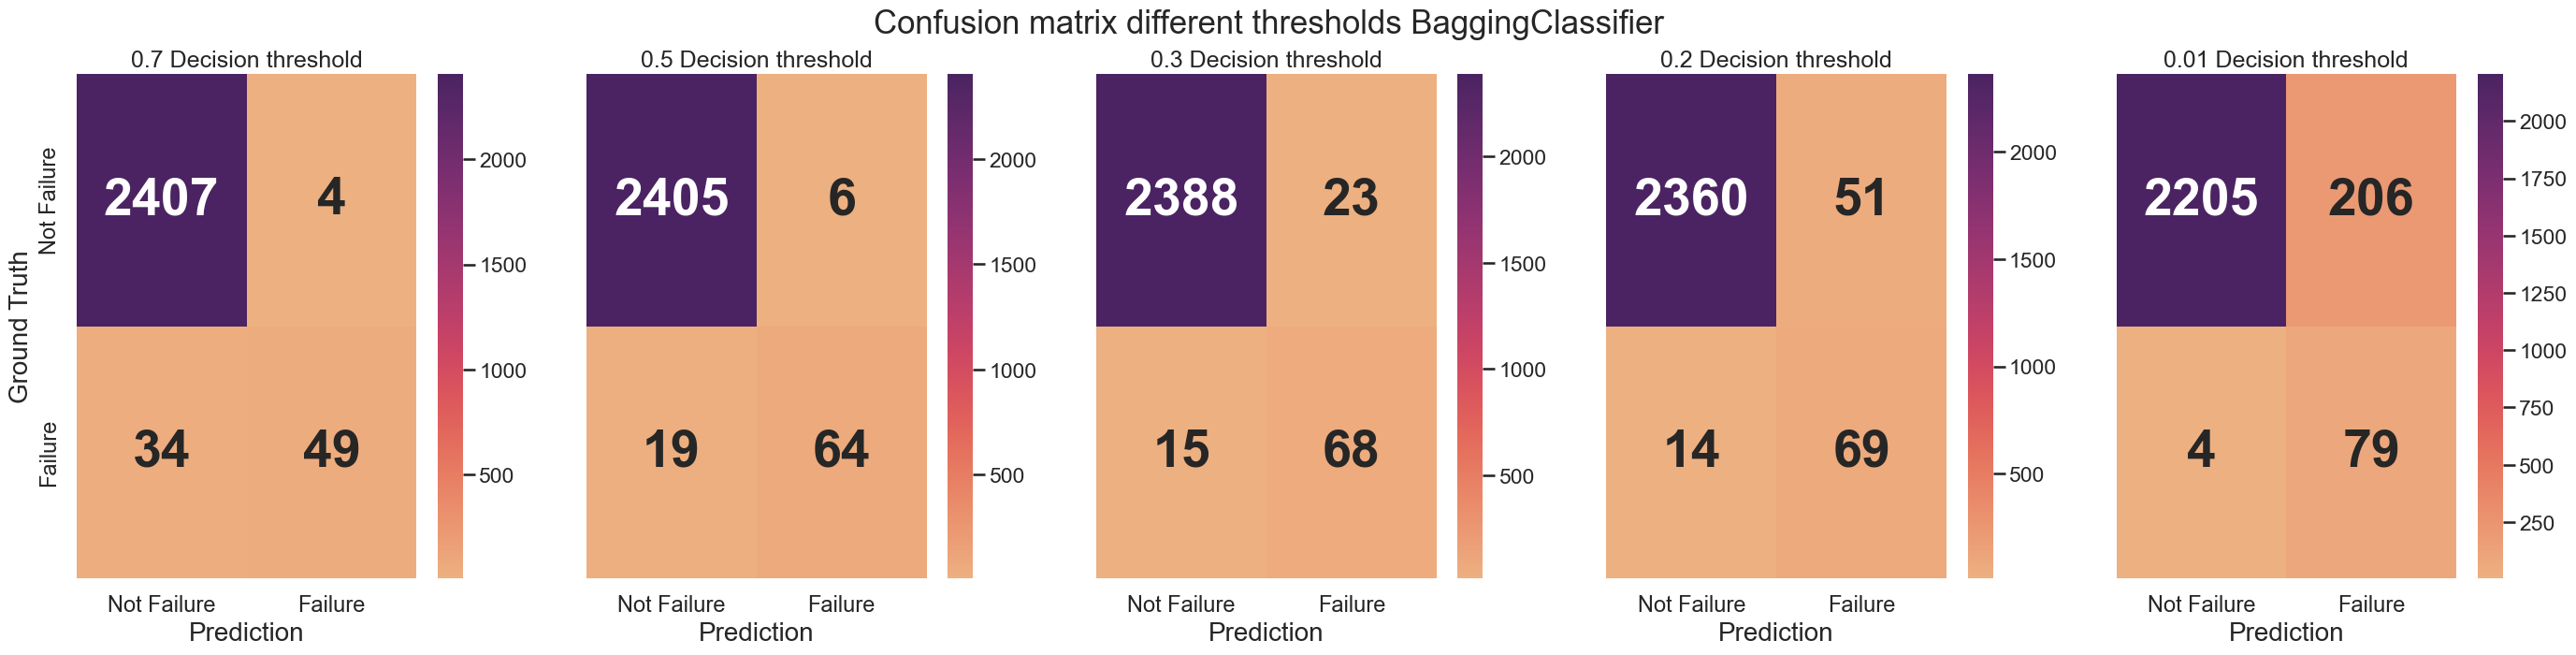

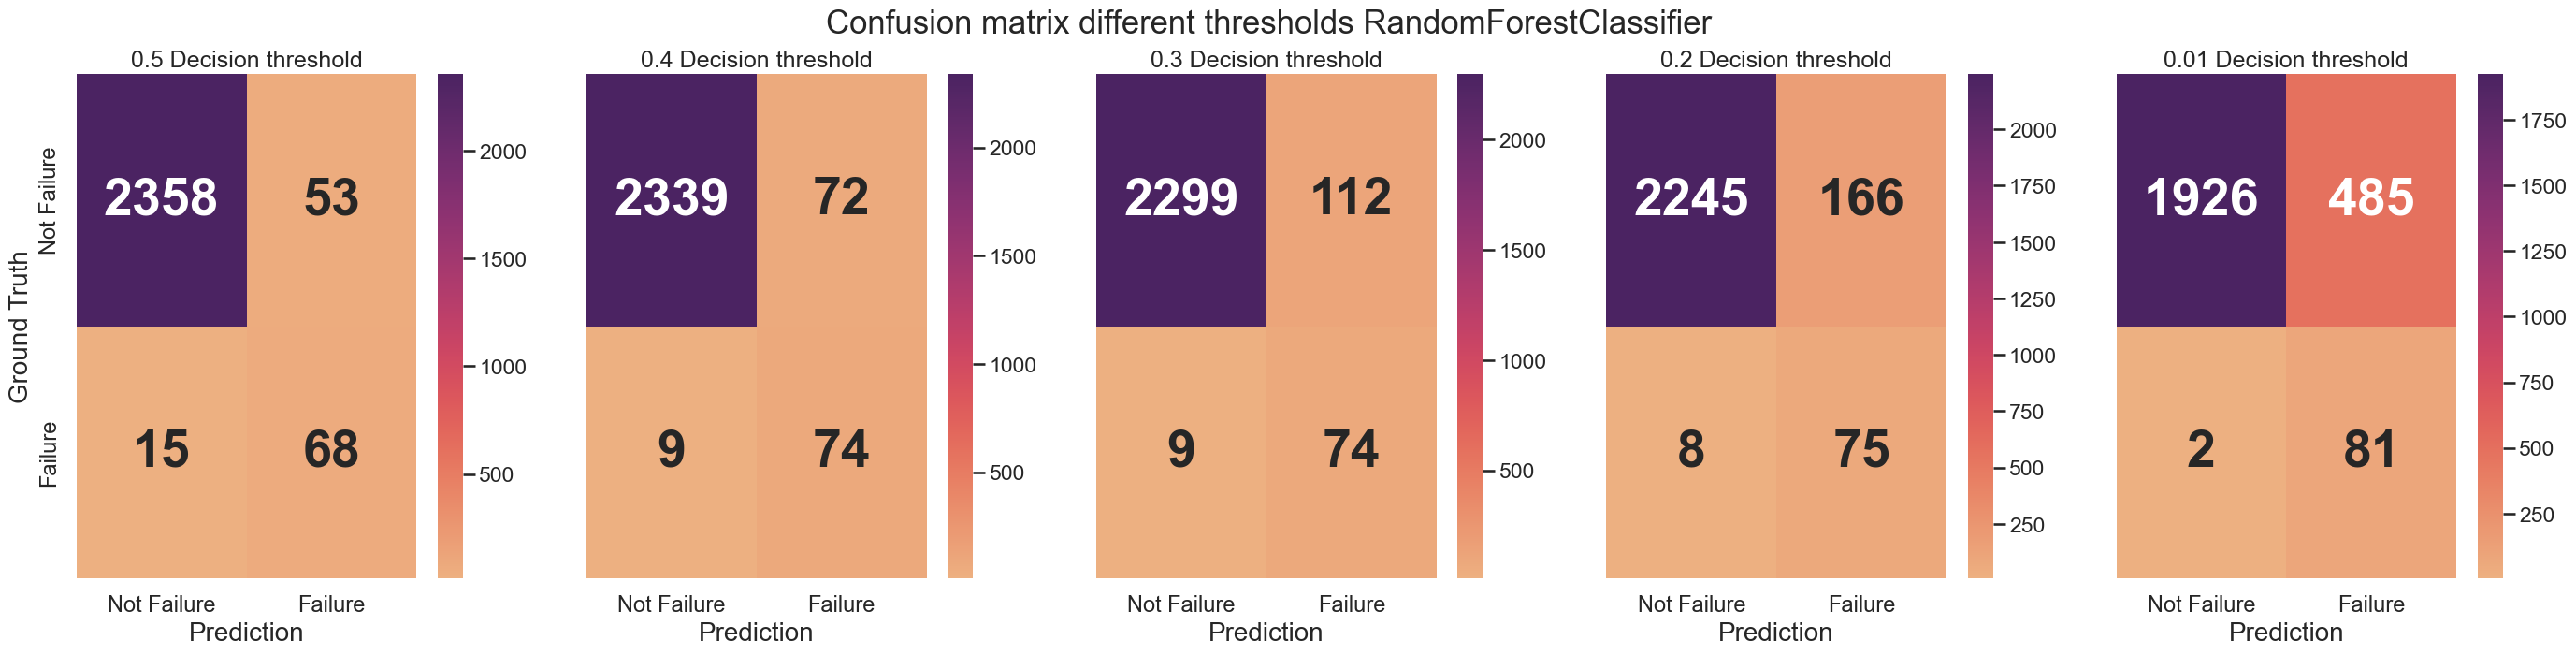

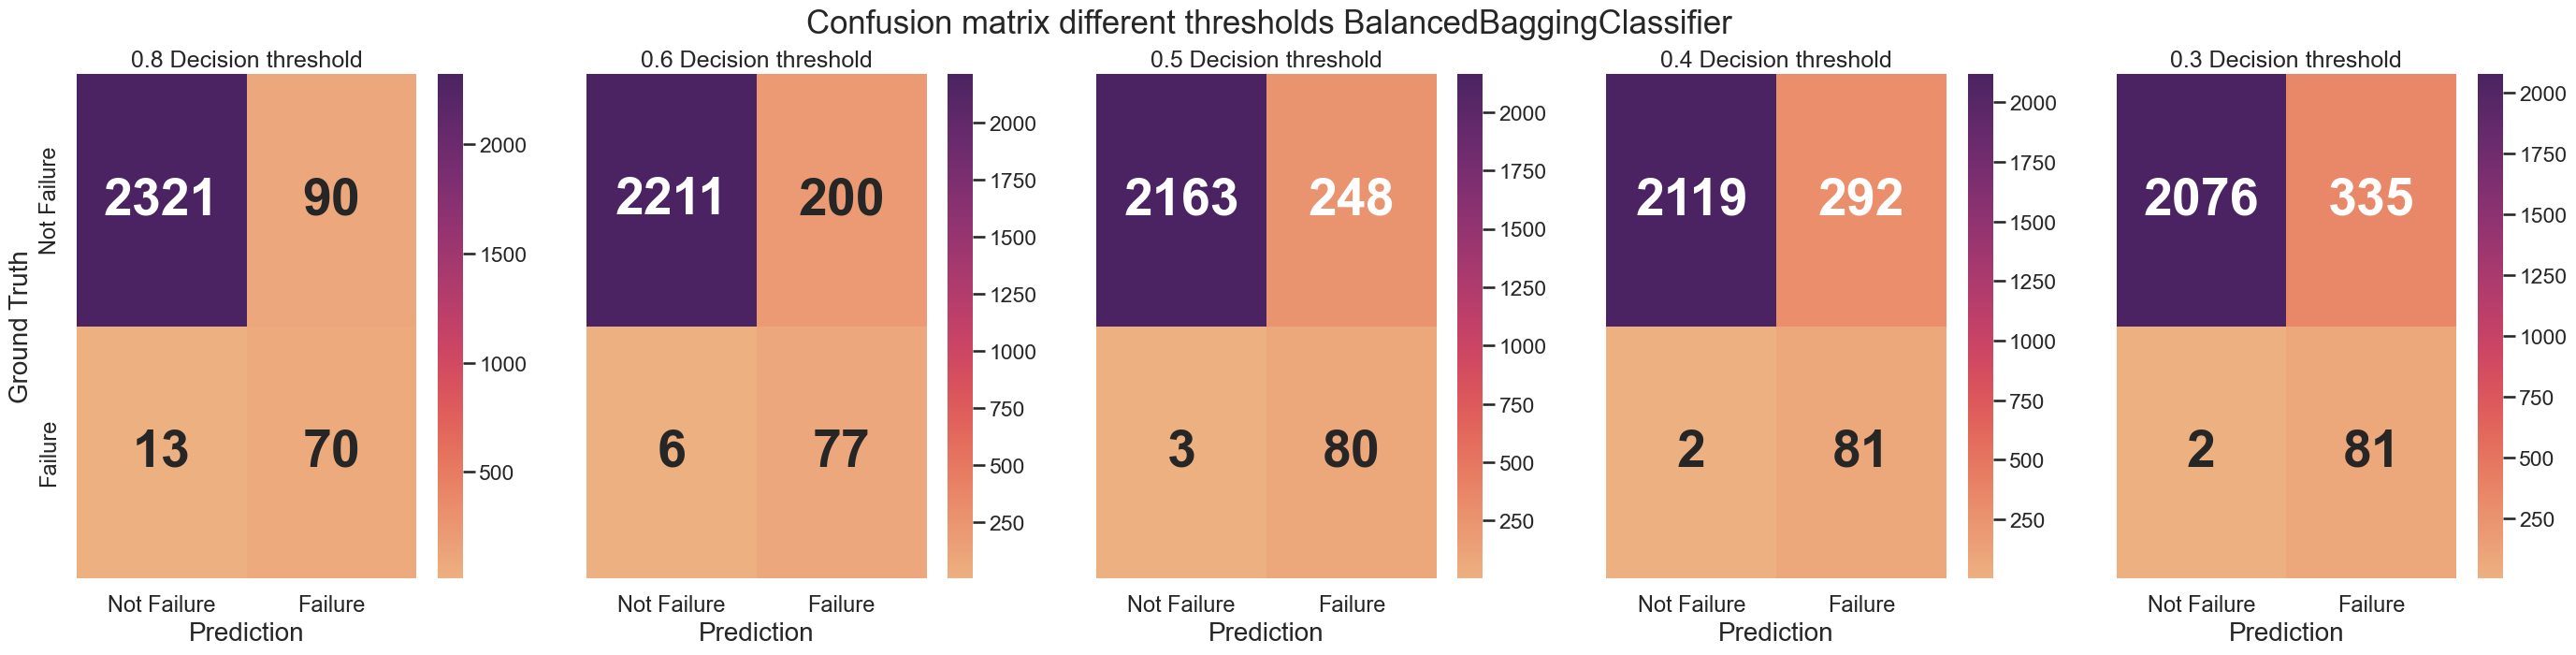

In [327]:
def confusion_matrix_threshold(model, threshold:list):
    # Prediction probabilities with different thresholds
    y_pred_dt = (model.predict_proba(X_test)[:,1] >= threshold[0]).astype(bool).astype(int)
    y_pred_dt_2 = (model.predict_proba(X_test)[:,1] >= threshold[1]).astype(bool).astype(int)
    y_pred_dt_3 = (model.predict_proba(X_test)[:,1] >= threshold[2]).astype(bool).astype(int)
    y_pred_dt_4 = (model.predict_proba(X_test)[:,1] >= threshold[3]).astype(bool).astype(int)
    y_pred_dt_5 = (model.predict_proba(X_test)[:,1] >= threshold[4]).astype(bool).astype(int)
    
    # Confusion matrices with different thresholds
    cm_dt = confusion_matrix(y_test, y_pred_dt)
    cm_dt_2 = confusion_matrix(y_test, y_pred_dt_2)
    cm_dt_3 = confusion_matrix(y_test, y_pred_dt_3)
    cm_dt_4 = confusion_matrix(y_test, y_pred_dt_4)
    cm_dt_5 = confusion_matrix(y_test, y_pred_dt_5)

    # Plotting confusion matrices
    fig, ax = plt.subplots(1,5,figsize=(34,7))
    ax.flatten()
    fig.suptitle('Confusion matrix different thresholds ' + str(model).split('(')[0], fontsize=25)

    sns.heatmap(cm_dt, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=ax[0])
    sns.heatmap(cm_dt_2, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=ax[1])
    sns.heatmap(cm_dt_3, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=ax[2])
    sns.heatmap(cm_dt_4, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=ax[3])
    sns.heatmap(cm_dt_5, annot=True, fmt='d', cmap='flare', annot_kws={"size": 40, "weight": "bold"}, ax=ax[4])

    ax[0].set_title(f'{threshold[0]} Decision threshold')
    ax[1].set_title(f'{threshold[1]} Decision threshold')
    ax[2].set_title(f'{threshold[2]} Decision threshold')
    ax[3].set_title(f'{threshold[3]} Decision threshold')
    ax[4].set_title(f'{threshold[4]} Decision threshold')

    labels = ['Not Failure', 'Failure']
    for i in [0,1,2,3,4]:
        ax[i].set_xticklabels(labels, fontsize=17)
        ax[i].set_xlabel('Prediction', fontsize=20)
        ax[i].set_yticklabels(['',''])

    ax[0].set_ylabel('Ground Truth', fontsize=20)
    ax[0].set_yticklabels(labels, fontsize=17)

confusion_matrix_threshold(bag_model, [0.7, 0.5, 0.3, 0.2, 0.01])
confusion_matrix_threshold(rf_model, [0.5, 0.4, 0.3, 0.2, 0.01])
confusion_matrix_threshold(bal_bag_model, [0.8, 0.6, 0.5, 0.4, 0.3])
plt.show()

Let's explain the results...

Decision threshold 0.5:
- Balanced bagging classifier was not able to predict only 2 failures. 251 times classified no failures as failures.
- Bagging Tomek Links was not able to predict 21 failures. But, it misclassified no failures only 6 times. 
- Random forest borderline SMOTE was not able to predict 12 failures. It misclassified no failures 32 times.
    
**Takeaways**:

The bagging tomek links model is not able to reduce the recall on failures lower than 95.18%. Even with a decision threshold of 0.01 (which makes no sense) it still misclassified 4 failures and had 201 false positives. On the other, balanced bagging with a decision threshold of 0.6 is able to have better recall (96.25%) and the same number of false positives (201). Moreover, it is able to reduce the recall down to 98.8% (only 1 misclassified failure) at the expense of increasing the number of positives (336). But, it is the only one of the three models to get this very high recall. 
 

<span style="color:#26488F; font-size:18px; font-weight: bold;">  Conclusions </span>

In my opinion, the experts from the maintenance and manufacturing departments should be the ones who choose the model in accordance with their objectives.
- If they are looking for the highest failure detection possible, they should go with the balanced bagging model, thou they would be sacrificing precision with lots of false positives. 
- If they want a balance between precision and recall, perhaps they could choose between the bagging model 0.4 decision threshold or the random forest model with 0.5  threshold. 
- Maybe they do not care much about predicting every failure, but when they do, they want the highest precision possible. In that case, it would be better to opt for the bagging tomek links classifier with a bit higher decision threshold. 

So, the selection of the model depends on the application and desired outcomes.


<span style="color:#26488F; font-size:22px; font-weight: bold;">  Saving the Models </span>

In [335]:
with open("Bagging_binary_1.pkl","wb") as files:
    pickle.dump(bag_model,files)
with open("RandomForest_binary_2.pkl","wb") as files:
    pickle.dump(rf_model,files)
with open("BalancedBagging_binary_3.pkl","wb") as files:
    pickle.dump(bal_bag_model,files)

<span style="color:#26488F; font-size:28px; font-weight: bold;">  Modeling with 'Failure Type' target </span>

Now, let's treat the problem as a multiclass one.

In [342]:
X = df.drop(['Target', 'Failure_Type_encoded'], axis=1)
y = df['Failure_Type_encoded']

sss = StratifiedShuffleSplit(n_splits=1, test_size=0.25, random_state=42)

for train_index, test_index in sss.split(X, y):
    X_train, X_test = X.loc[train_index], X.loc[test_index]
    y_train, y_test = y.loc[train_index], y.loc[test_index]

print('Checking the stratified split...')
print('Target proportion in original dataset:')
print(df['Failure_Type_encoded'].value_counts(normalize=True))

print('Target proportion in y_train dataset:')
print(y_train.value_counts(normalize=True))

print('Target proportion in y_test dataset:')
print(y_test.value_counts(normalize=True))

Checking the stratified split...
Target proportion in original dataset:
Failure_Type_encoded
0.0    0.966911
4.0    0.011230
1.0    0.009526
3.0    0.007821
2.0    0.004512
Name: proportion, dtype: float64
Target proportion in y_train dataset:
Failure_Type_encoded
0.0    0.966974
4.0    0.011231
1.0    0.009493
3.0    0.007755
2.0    0.004546
Name: proportion, dtype: float64
Target proportion in y_test dataset:
Failure_Type_encoded
0.0    0.966720
4.0    0.011227
1.0    0.009623
3.0    0.008019
2.0    0.004411
Name: proportion, dtype: float64


`The proportions are similar. Therefore, it was correctly splitted.`

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Balanced Models </span>

Fitting BalancedRandomForestClassifier(n_jobs=-1, random_state=42)
ROC AUC test set: 0.9804073571858034

Fitting BalancedBaggingClassifier(n_jobs=-1, random_state=42)
ROC AUC test set: 0.9654332879269187

Fitting RUSBoostClassifier(random_state=42)
ROC AUC test set: 0.9344055948023641

Fitting EasyEnsembleClassifier(random_state=42)
ROC AUC test set: 0.9684156946079426



Text(0.5, 1.0, 'Easy Ensemble')

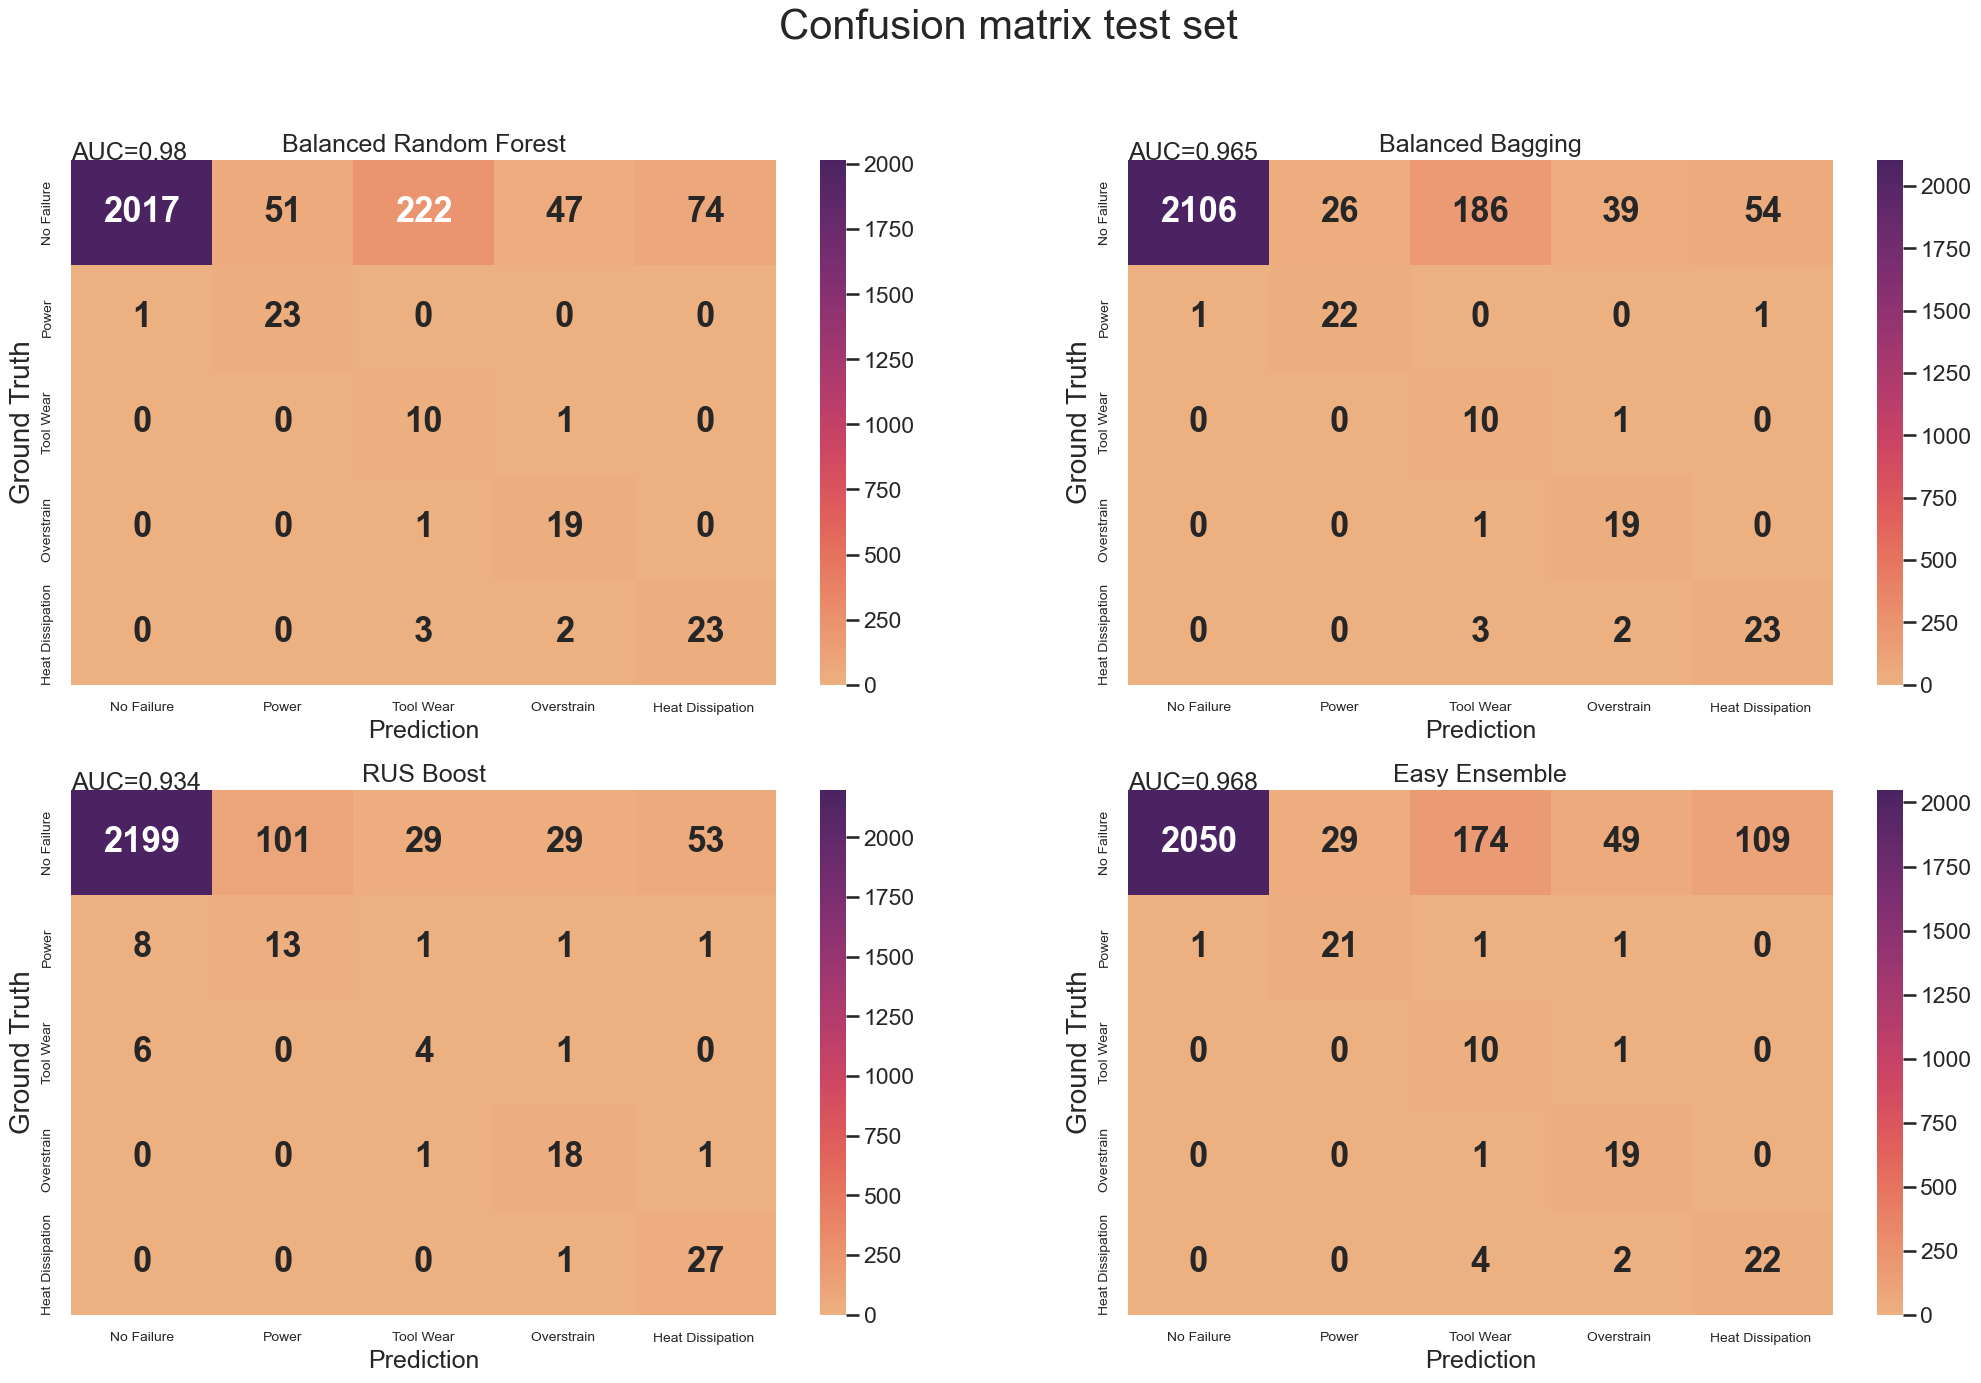

In [346]:
brfc = BalancedRandomForestClassifier(random_state=42, n_jobs=-1)
bbc = BalancedBaggingClassifier(random_state=42, n_jobs=-1)
RUSB = RUSBoostClassifier(random_state=42)
EEC = EasyEnsembleClassifier(random_state=42)

fig, axes = plt.subplots(2, 2, figsize=[25,15])
fig.suptitle('Confusion matrix test set', fontsize=30)
# axes.flatten()
i=0
j=0
for model in [brfc, bbc, RUSB, EEC]:
    print('Fitting', model)
    model = model.fit(X_train, y_train)

    cv = StratifiedShuffleSplit(n_splits=5, test_size=0.25)
    
    y_pred = model.predict(X_test)
    y_preb_probs = model.predict_proba(X_test)

    print(f'ROC AUC test set: {roc_auc_score(y_test, y_preb_probs, average="macro", multi_class="ovr")}')

    print()
    
    if j == 2:
        j = 0
        i = 1
        
    sns.set_context('talk')
    cm = confusion_matrix(y_test, y_pred)
    sns.heatmap(cm, annot=True, fmt='d', cmap='flare', annot_kws={"size": 25, "weight": "bold"}, ax=axes[i,j])

    labels =  ['No Failure',
               'Power',
               'Tool Wear',
               'Overstrain ',
               'Heat Dissipation ']
    axes[i,j].set_xticklabels(labels, fontsize=10);
    axes[i,j].set_yticklabels(labels, fontsize=10);
    axes[i,j].set_ylabel('Ground Truth', fontsize=20);
    axes[i,j].set_xlabel('Prediction')
    axes[i,j].annotate('AUC=' + str(round(roc_auc_score(y_test, y_preb_probs, average="macro", multi_class="ovr"),3)), xy=[0,0])
    j += 1

axes[0,0].set_title('Balanced Random Forest')
axes[0,1].set_title('Balanced Bagging')
axes[1,0].set_title('RUS Boost')
axes[1,1].set_title('Easy Ensemble')

Again, Balanced Random Forest and Balanced Bagging outpeformed the other two algorithms.

<span style="color:#26488F; font-size:18px; font-weight: bold;">  Balanced Random Forest (Random Search) </span> 

In [350]:
brfc = BalancedRandomForestClassifier(random_state=42, n_jobs=-1)

params = {'n_estimators': np.arange(150, 400, 50),
               'max_depth': np.arange(10, 50, 10),
               'min_samples_split': [2, 4, 6],
               'criterion': ['gini', 'entropy'],
               'min_samples_leaf': [1, 2, 3, 4],
               'max_features': ['sqrt', 'log2']
            }

random_search = RandomizedSearchCV(brfc, params, cv=3,
                                   n_iter=100, random_state=42, n_jobs=-1)

random_search = random_search.fit(X_train, y_train)

# Best parameters from random search
print(random_search.best_params_)

{'n_estimators': 150, 'min_samples_split': 6, 'min_samples_leaf': 1, 'max_features': 'log2', 'max_depth': 10, 'criterion': 'gini'}


<span style="color:#26488F; font-size:18px; font-weight: bold;">  Balanced Random Forest (Grid Search) </span>

In [353]:
brfc = BalancedRandomForestClassifier(max_features='sqrt', random_state=42, n_jobs=-1)

params = {'n_estimators': [40, 50, 60],
               'max_depth': [15, 20, 25],
               'min_samples_leaf': [1, 2]
            }

grid_search = GridSearchCV(brfc, params, cv=cv,
                           n_jobs=-1)

grid_search = grid_search.fit(X_train, y_train)
# Best parameters from grid search
grid_search.best_params_

{'max_depth': 15, 'min_samples_leaf': 1, 'n_estimators': 40}

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Training both models with the best hyperparameters </span>

In [356]:
# Balanced Random Forest
brfc = BalancedRandomForestClassifier(n_estimators=40, max_depth=15, min_samples_leaf=1,
                                     max_features='sqrt', random_state=42, n_jobs=-1)

brfc = brfc.fit(X_train, y_train)
y_pred_brfc = brfc.predict(X_test)
y_pred_probs_brfc = brfc.predict_proba(X_test)

# Balanced Bagging
bbc = BalancedBaggingClassifier(n_estimators=13, random_state=42, n_jobs=-1)
bbc = bbc.fit(X_train, y_train)
y_pred_bbc = bbc.predict(X_test)
y_pred_probs_bbc = bbc.predict_proba(X_test)

In [360]:
y_pred_probs_brfc

array([[0.95 , 0.   , 0.05 , 0.   , 0.   ],
       [0.875, 0.05 , 0.075, 0.   , 0.   ],
       [0.075, 0.1  , 0.05 , 0.725, 0.05 ],
       ...,
       [0.5  , 0.25 , 0.025, 0.175, 0.05 ],
       [0.9  , 0.05 , 0.05 , 0.   , 0.   ],
       [0.75 , 0.075, 0.05 , 0.   , 0.125]])

In [358]:
y_pred_probs_bbc

array([[1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [0.23076923, 0.        , 0.        , 0.76923077, 0.        ],
       ...,
       [0.76923077, 0.        , 0.        , 0.07692308, 0.15384615],
       [1.        , 0.        , 0.        , 0.        , 0.        ],
       [1.        , 0.        , 0.        , 0.        , 0.        ]])

<span style="color:#26488F; font-size:18px; font-weight: bold;">  Scores </span>

In [365]:
# Balanced Random Forest scores
print('Results for Balanced Random Forest')
print(classification_report(y_test, y_pred_brfc))
print('Macro roc auc (OvR): ', roc_auc_score(y_test, y_pred_probs_brfc, average="macro", multi_class="ovr"))
print('-'*53)
print()

# Balanced Bagging scores
print('Results for Balanced Bagging')
print(classification_report(y_test, y_pred_bbc))
print('Macro roc auc (OvR): ', roc_auc_score(y_test, y_pred_probs_bbc, average="macro", multi_class="ovr"))

Results for Balanced Random Forest
              precision    recall  f1-score   support

         0.0       1.00      0.84      0.91      2411
         1.0       0.34      0.96      0.50        24
         2.0       0.04      0.91      0.08        11
         3.0       0.24      0.95      0.38        20
         4.0       0.23      0.79      0.36        28

    accuracy                           0.84      2494
   macro avg       0.37      0.89      0.45      2494
weighted avg       0.97      0.84      0.89      2494

Macro roc auc (OvR):  0.9783049578697149
-----------------------------------------------------

Results for Balanced Bagging
              precision    recall  f1-score   support

         0.0       1.00      0.87      0.93      2411
         1.0       0.48      0.96      0.64        24
         2.0       0.05      0.91      0.09        11
         3.0       0.31      0.90      0.46        20
         4.0       0.28      0.86      0.42        28

    accuracy             

Results for Balanced Random Forest


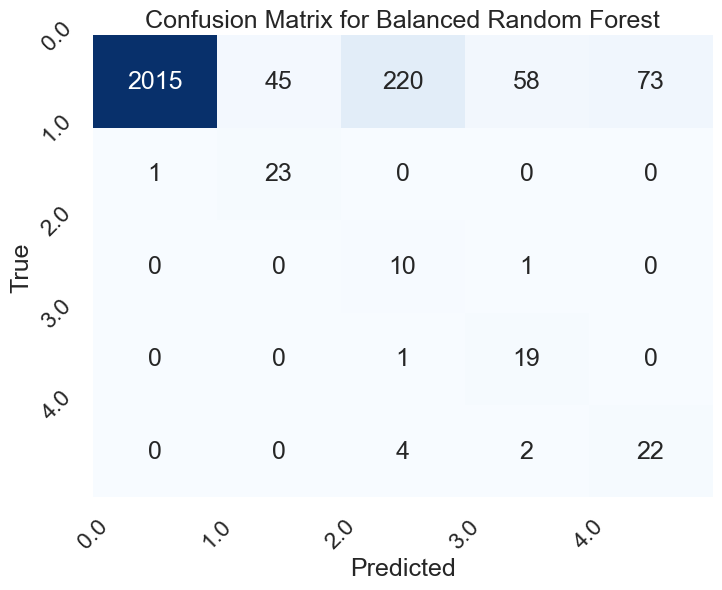

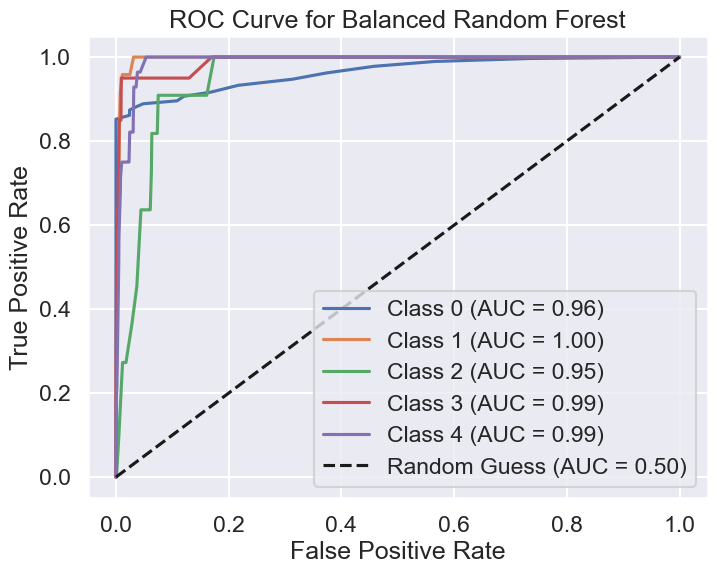

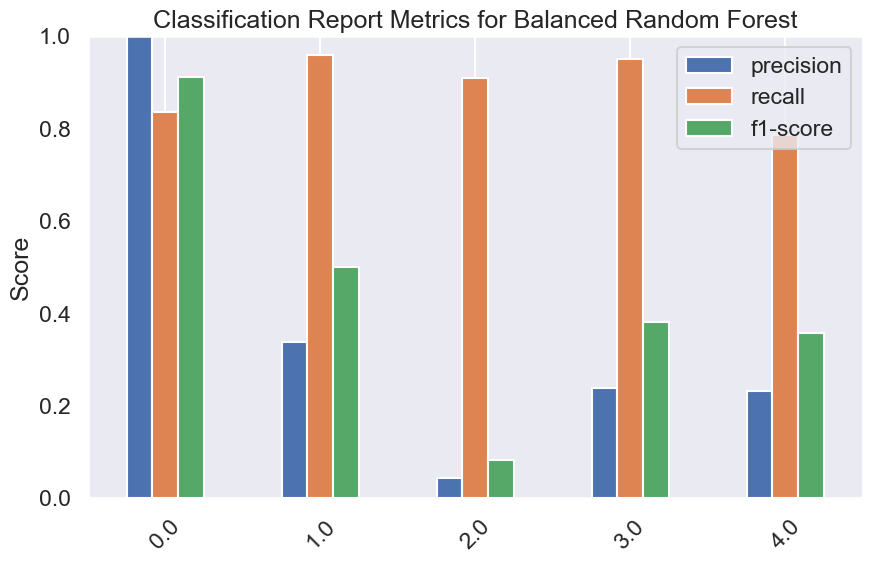

Results for Balanced Bagging


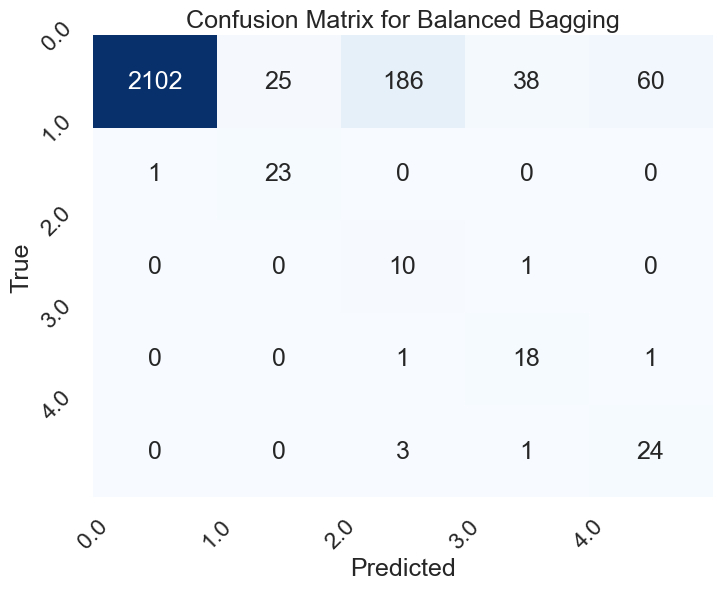

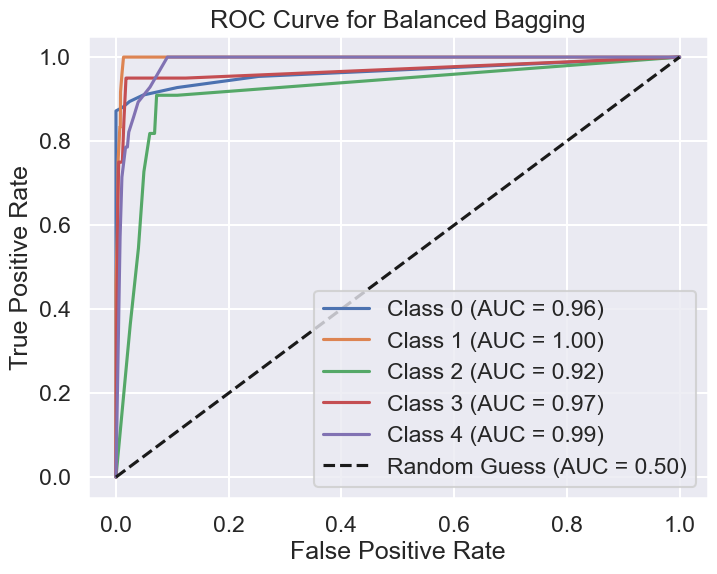

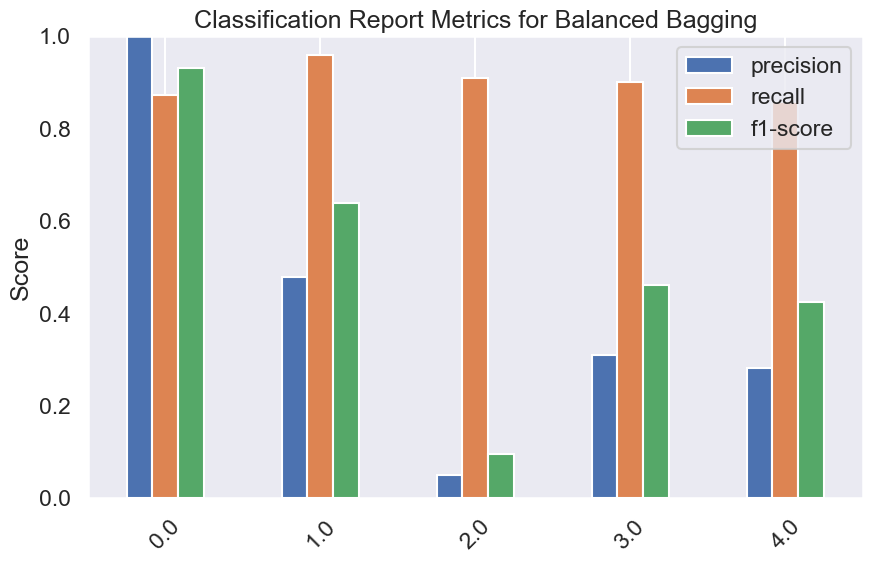

In [367]:
from sklearn.metrics import confusion_matrix, roc_curve, auc

# Function to plot confusion matrix
def plot_confusion_matrix(y_true, y_pred, title):
    cm = confusion_matrix(y_true, y_pred)
    plt.figure(figsize=(8, 6))
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False)
    plt.title(title)
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.xticks(ticks=np.arange(len(set(y_true))), labels=set(y_true), rotation=45)
    plt.yticks(ticks=np.arange(len(set(y_true))), labels=set(y_true), rotation=45)
    plt.show()

# Function to plot ROC curve
def plot_roc_curve(y_true, y_probs, title):
    fpr = {}
    tpr = {}
    roc_auc = {}
    n_classes = len(set(y_true))

    for i in range(n_classes):
        fpr[i], tpr[i], _ = roc_curve(y_true, y_probs[:, i], pos_label=i)
        roc_auc[i] = auc(fpr[i], tpr[i])

    plt.figure(figsize=(8, 6))
    for i in range(n_classes):
        plt.plot(fpr[i], tpr[i], label='Class {0} (AUC = {1:0.2f})'.format(i, roc_auc[i]))
    plt.plot([0, 1], [0, 1], 'k--', label='Random Guess (AUC = 0.50)')
    plt.title(title)
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.legend(loc='lower right')
    plt.show()

# Function to plot classification metrics
def plot_classification_report(y_true, y_pred, title):
    report = classification_report(y_true, y_pred, output_dict=True)
    metrics = ['precision', 'recall', 'f1-score']
    classes = list(report.keys())[:-3]  # Exclude the last three (accuracy, macro avg, weighted avg)

    metrics_values = {metric: [] for metric in metrics}

    for cls in classes:
        for metric in metrics:
            metrics_values[metric].append(report[cls][metric])

    metrics_df = pd.DataFrame(metrics_values, index=classes)

    metrics_df.plot(kind='bar', figsize=(10, 6))
    plt.title(title)
    plt.xticks(rotation=45)
    plt.ylabel('Score')
    plt.ylim(0, 1)
    plt.grid(axis='y')
    plt.show()

# Plot for Balanced Random Forest
print('Results for Balanced Random Forest')
plot_confusion_matrix(y_test, y_pred_brfc, 'Confusion Matrix for Balanced Random Forest')
plot_roc_curve(y_test, y_pred_probs_brfc, 'ROC Curve for Balanced Random Forest')
plot_classification_report(y_test, y_pred_brfc, 'Classification Report Metrics for Balanced Random Forest')

# Plot for Balanced Bagging
print('Results for Balanced Bagging')
plot_confusion_matrix(y_test, y_pred_bbc, 'Confusion Matrix for Balanced Bagging')
plot_roc_curve(y_test, y_pred_probs_bbc, 'ROC Curve for Balanced Bagging')
plot_classification_report(y_test, y_pred_bbc, 'Classification Report Metrics for Balanced Bagging')


**Conclusion:** Balance Random Forest has a slightly lower ROC AUC (OvR) but higher f1 score (both macro and weighted).
Let's take a look at the confusion matrices:

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Confusion matrix </span>

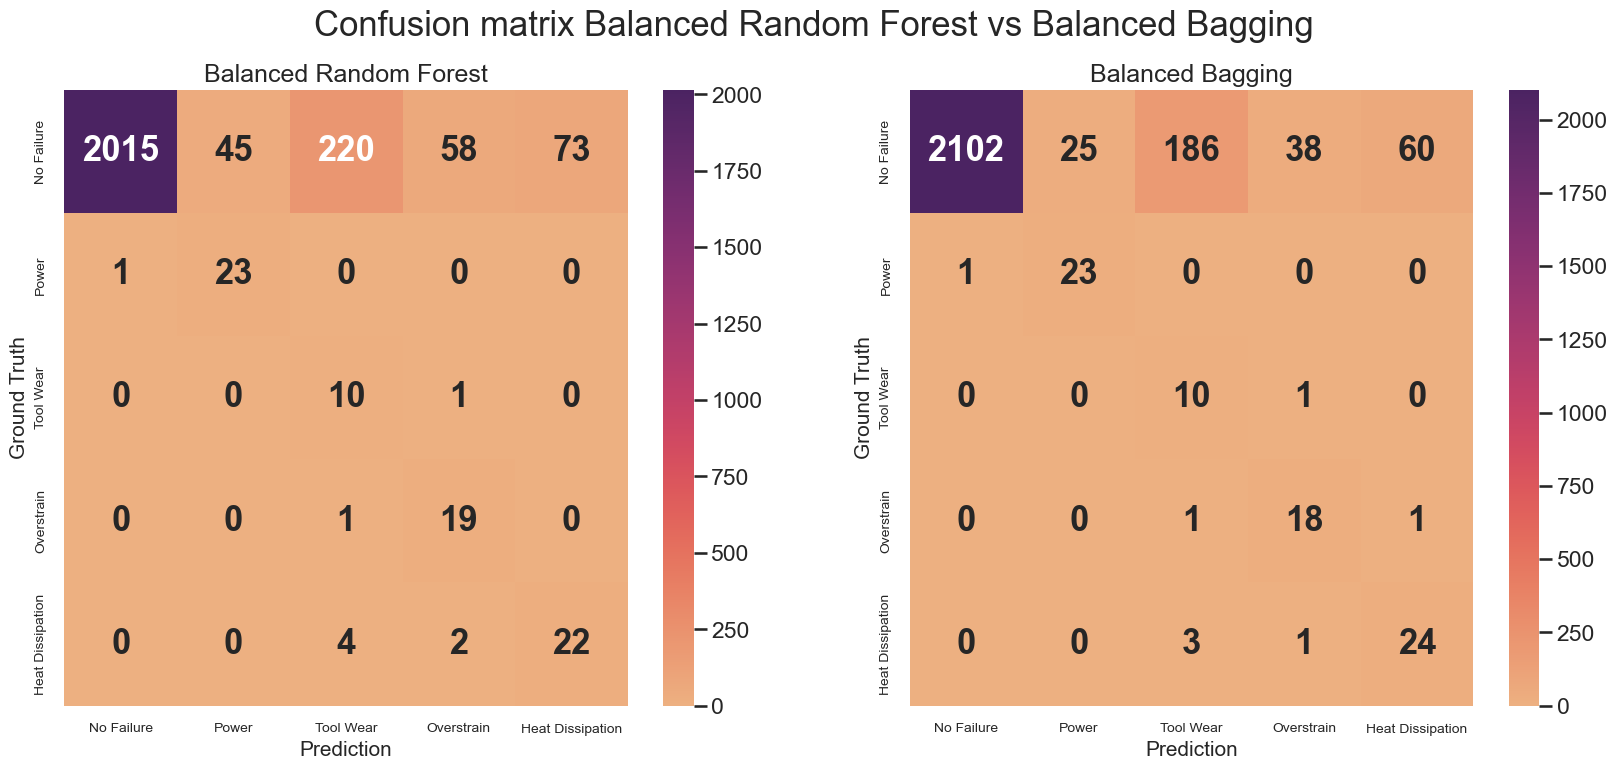

In [371]:
cm_brfc = confusion_matrix(y_test, y_pred_brfc)
cm_bbc = confusion_matrix(y_test, y_pred_bbc)

# Plotting confusion matrices
fig, ax = plt.subplots(1,2,figsize=(20,8))
ax.flatten()
fig.suptitle('Confusion matrix Balanced Random Forest vs Balanced Bagging', fontsize=25)

sns.heatmap(cm_brfc, annot=True, fmt='d', cmap='flare', annot_kws={"size": 25, "weight": "bold"}, ax=ax[0])
sns.heatmap(cm_bbc, annot=True, fmt='d', cmap='flare', annot_kws={"size": 25, "weight": "bold"}, ax=ax[1])

ax[0].set_title('Balanced Random Forest')
ax[1].set_title('Balanced Bagging')

labels =  ['No Failure',
           'Power',
           'Tool Wear',
           'Overstrain',
           'Heat Dissipation']

for i in [0,1]:
    ax[i].set_xticklabels(labels, fontsize=10);
    ax[i].set_yticklabels(labels, fontsize=10);
    ax[i].set_ylabel('Ground Truth', fontsize=15);
    ax[i].set_xlabel('Prediction', fontsize=15)

<span style="color:#26488F; font-size:18px; font-weight: bold;">End Conclusions: </span>


The performance of both models is really close to each other. 
* There is a bit of a tendency to misclassify Heat Dissipation Failure as Tool Wear Failure.
* Balanced Random Forest is able to detect every failure, although sometimes it misclassifies them. Balanced Bagging was not able to detect one power failure. 

I would pick Balanced Bagging classifier for the following reasons:
* The recall scores are slightly lower. But, we can see in the confusion matrix that the precision for each class is higher.
* Since we know that sometimes Heat Dissipation Failures are classified as Tool Wear Failures, we might take the appropriate actions to deal with such maintenance in real-world applications. In other words, if we predict a Heat Dissipation Failure, we might check the tool wear as well.
* However, such a decision should be supported by the maintenance and manufacturing teams. It is difficult to pick without taking into account the real application. As mentioned before, they might want to get higher precision and reducing recall. 

<span style="color:#26488F; font-size:22px; font-weight: bold;">  Save Model </span>

In [378]:
with open("Balanced_Bagging_multiclass.pkl","wb") as files:
    pickle.dump(bbc,files)
with open("Balanced_RandomForest_multiclass.pkl","wb") as files:
    pickle.dump(brfc,files)